## Import Required Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

## 1. EDA ( Train and Test Both)

### Read the Dataset

In [4]:
d1 = pd.read_csv('data\\house_price_prediction\\train.csv')
d2 = pd.read_csv('data\\house_price_prediction\\test.csv')

In [5]:
print(d1.shape)
print(d2.shape)

(1460, 81)
(1459, 80)


### Make a copy of Original Dataset so anything happaned we can revert back to original

In [6]:
train = d1.copy()
test = d2.copy()
pd.set_option('display.max_column',None)

In [7]:
train.set_index('Id',inplace=True)
test.set_index('Id',inplace=True)

# #1.EDA For Train Dataset

### Understand the dataset 

In [8]:
train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [9]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

## Step 1. Find Missing Values In  Numeric and Catagorical Feature

###  #1. Select Numeric Columns

In [10]:
# select all numeric columns
#num_col = [features for features in data.columns if data[features].dtypes != 'object']
num_col = train.select_dtypes(exclude='object').columns

In [11]:
len(num_col)

37

### Find Missing values in Numeric Columns

In [12]:
miss_val = [f for f in num_col if train[f].isnull().sum()>0 ]

In [13]:
miss_val

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

### Missing values Number & Percentage 

In [14]:
# miss_val.remove('SalePrice')
# miss_val
train[miss_val].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [15]:
for f in miss_val:
    print(f,train[f].isnull().sum(),np.round((train[f].isnull().sum()/len(train[f]))*100,3))

LotFrontage 259 17.74
MasVnrArea 8 0.548
GarageYrBlt 81 5.548


## Fill missing val in Numeric Columns Data

In [16]:
for feature in miss_val:
    if feature != 'LotFrontage':
        median_val= train[feature].median()
        train[feature].fillna(median_val,inplace=True)

train.drop('LotFrontage',axis=1,inplace=True)


In [17]:
miss_val.remove('LotFrontage')
miss_val

['MasVnrArea', 'GarageYrBlt']

### Verify the Train dataset is there any Missing values present 

In [18]:
train[miss_val].isnull().sum().sort_values(ascending=False)

GarageYrBlt    0
MasVnrArea     0
dtype: int64

## #2.Catagorical Missing Values

###  Select Catagorical columns

In [19]:
cat_col = train.select_dtypes(include='object').columns

In [20]:
len(cat_col)

43

## Missing Values and percentage of Missing values in Catagorical columns

In [21]:
for f in cat_col:
    if train[f].isnull().sum() > 0:
        
      
        print(f,'--->',train[f].isnull().sum(),'--->',np.round((train[f].isnull().mean())*100,2),'--->','%','\n')

Alley ---> 1369 ---> 93.77 ---> % 

MasVnrType ---> 8 ---> 0.55 ---> % 

BsmtQual ---> 37 ---> 2.53 ---> % 

BsmtCond ---> 37 ---> 2.53 ---> % 

BsmtExposure ---> 38 ---> 2.6 ---> % 

BsmtFinType1 ---> 37 ---> 2.53 ---> % 

BsmtFinType2 ---> 38 ---> 2.6 ---> % 

Electrical ---> 1 ---> 0.07 ---> % 

FireplaceQu ---> 690 ---> 47.26 ---> % 

GarageType ---> 81 ---> 5.55 ---> % 

GarageFinish ---> 81 ---> 5.55 ---> % 

GarageQual ---> 81 ---> 5.55 ---> % 

GarageCond ---> 81 ---> 5.55 ---> % 

PoolQC ---> 1453 ---> 99.52 ---> % 

Fence ---> 1179 ---> 80.75 ---> % 

MiscFeature ---> 1406 ---> 96.3 ---> % 



## Handle missing Values in Calagorical Dataset

### Fill Nan values by 'Missing' String and Drop columns which has more than 80% Missing values

In [22]:
for feature in cat_col:
    if train[feature].isnull().mean() > 0.8:
        print('drop column name:',feature)
        train.drop(feature,axis=1,inplace=True)
    else:
        train[feature].fillna('Missing',inplace=True)
    

drop column name: Alley
drop column name: PoolQC
drop column name: Fence
drop column name: MiscFeature


## # Verify the dataset is there any missing values present or not in Catagorical dataset 

In [23]:
for f in train.columns:
    if  train[f].isnull().sum() > 0:
        print(f'There are null values in {f}')
else:
    print('there are no null values present')

there are no null values present


## Step 2. Find Outliers 

In [24]:
num_col = list(num_col)

In [25]:
outliers_col = [i for i in num_col if i in train.columns ]

In [26]:
outliers_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

###  Plot The Box-Plot for Outliars Visulizations

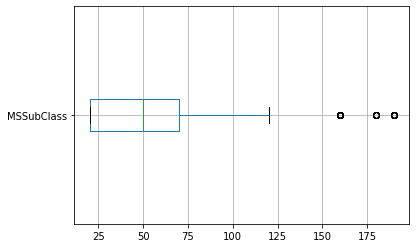

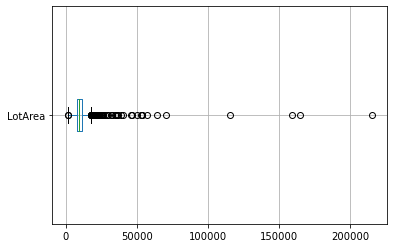

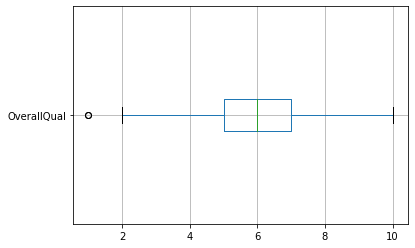

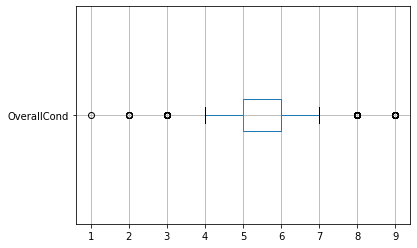

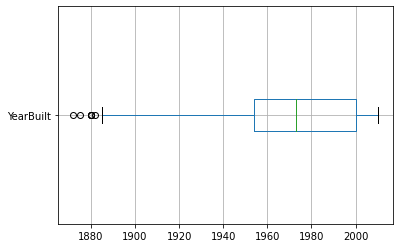

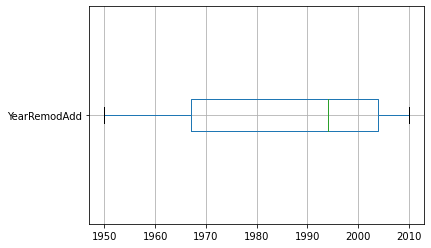

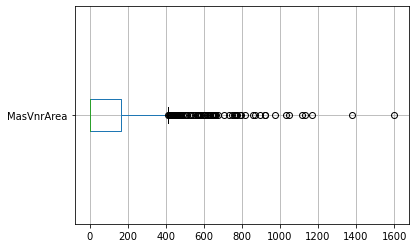

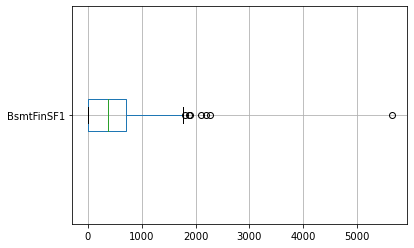

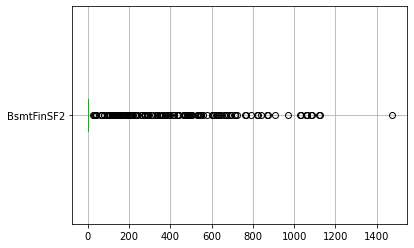

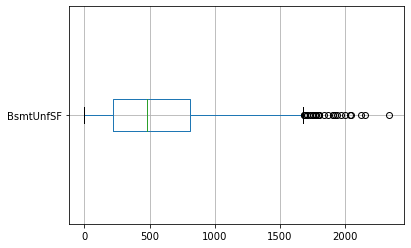

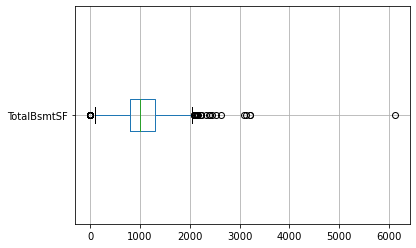

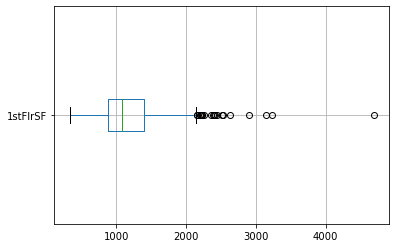

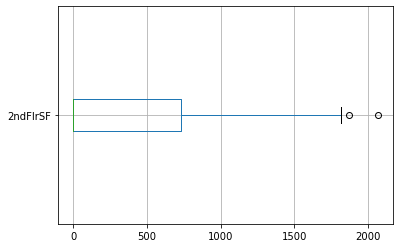

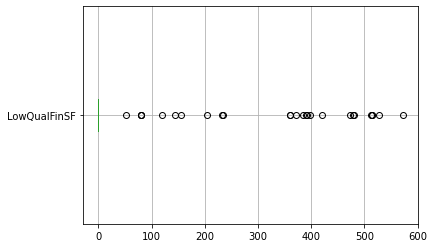

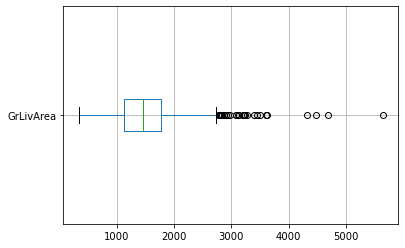

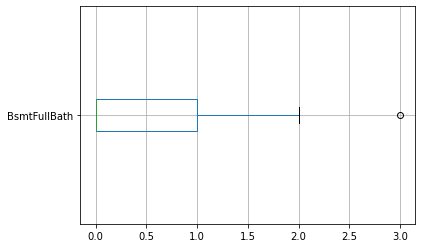

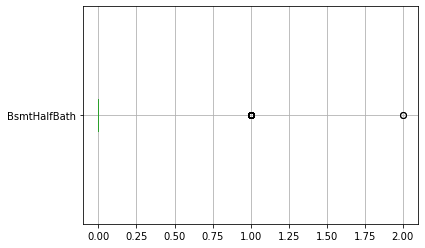

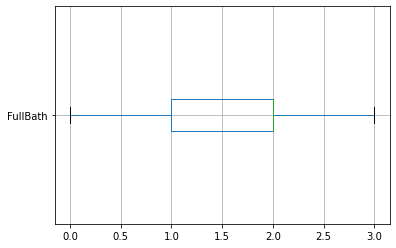

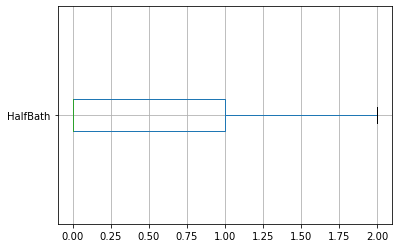

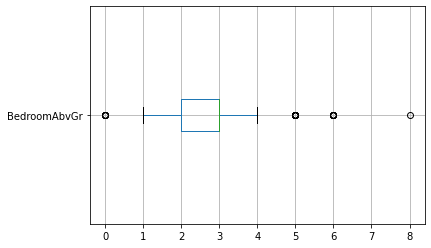

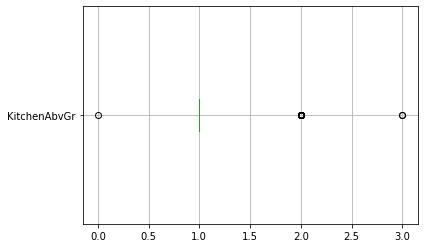

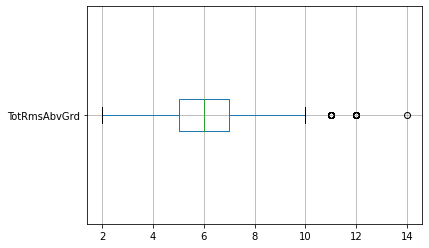

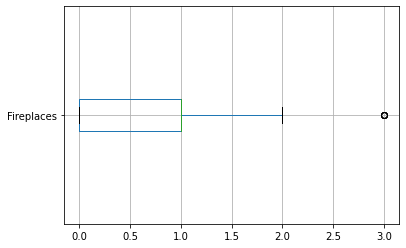

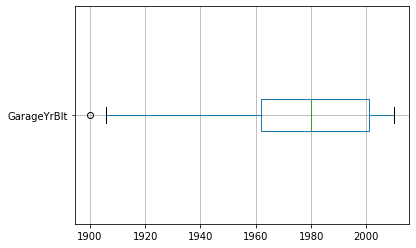

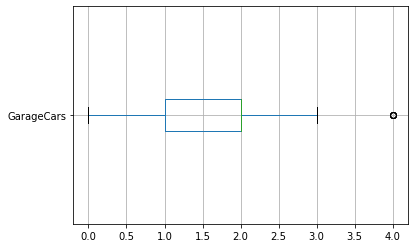

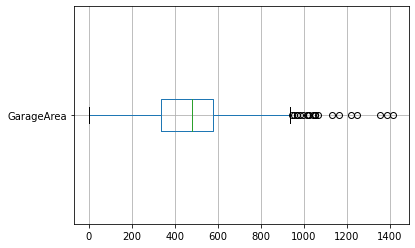

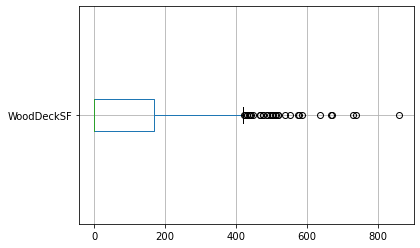

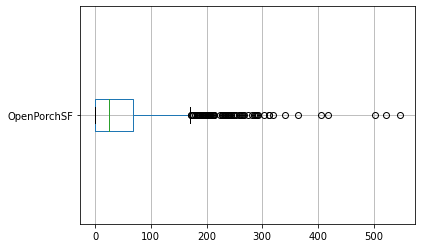

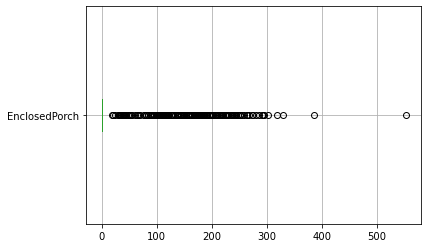

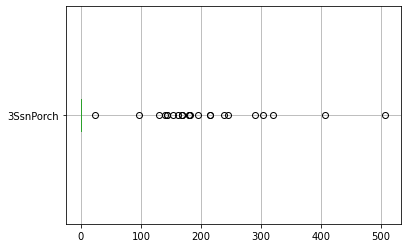

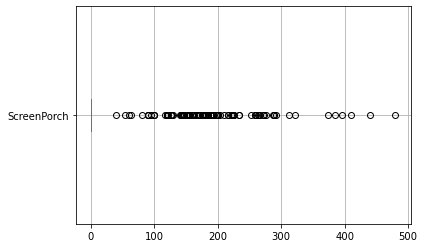

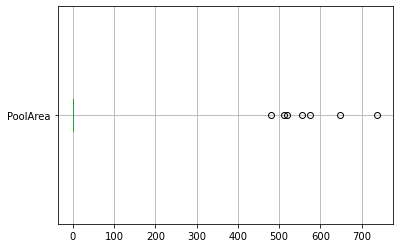

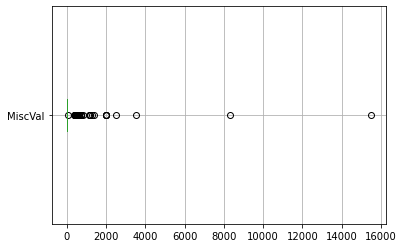

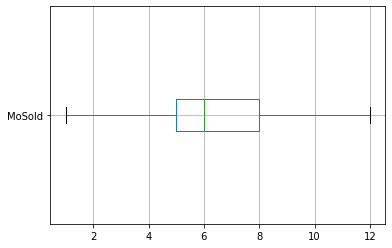

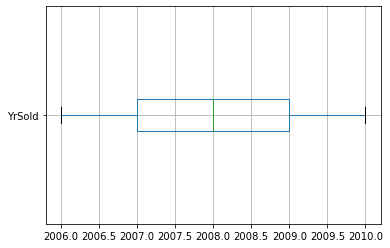

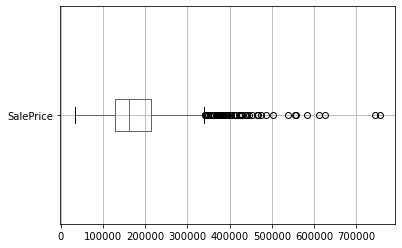

In [27]:
box = train.copy()
for feature in outliers_col:
    box.boxplot(feature,vert=False)
       
    plt.show()
   

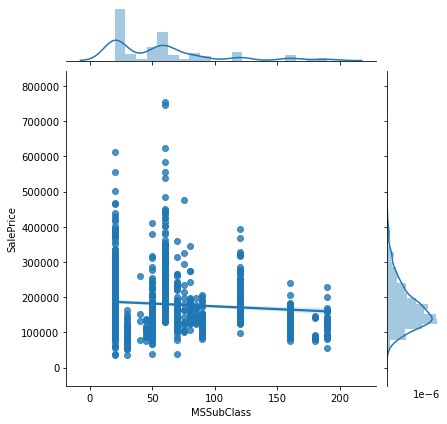

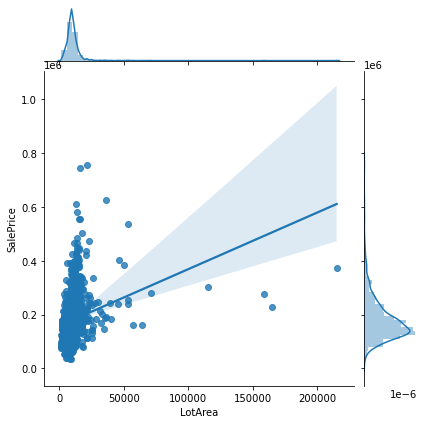

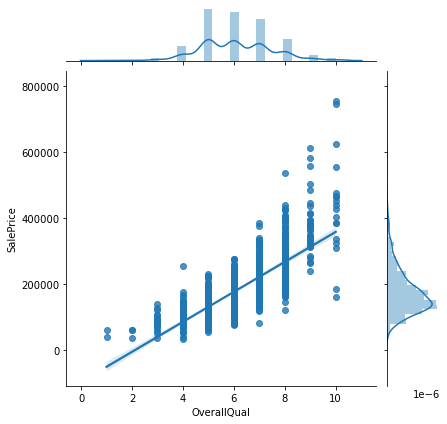

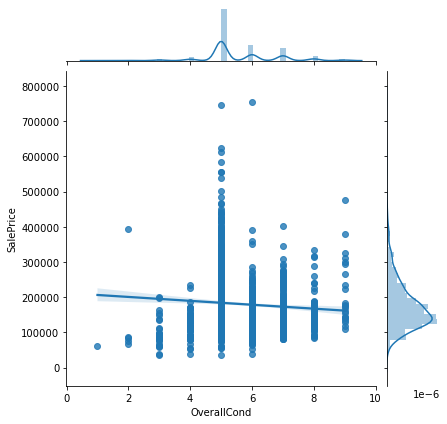

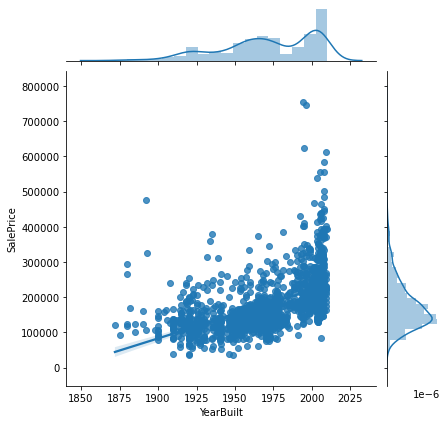

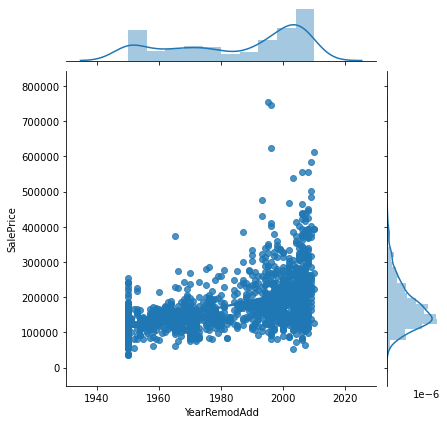

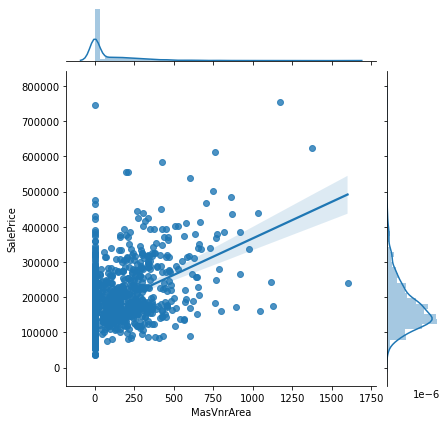

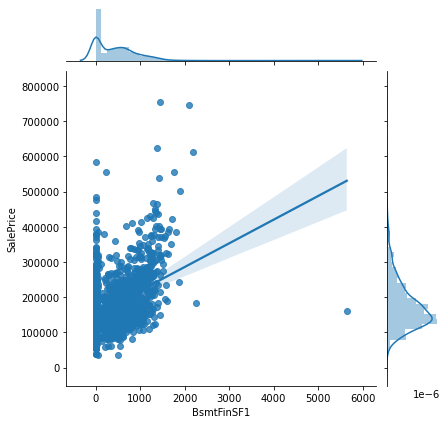

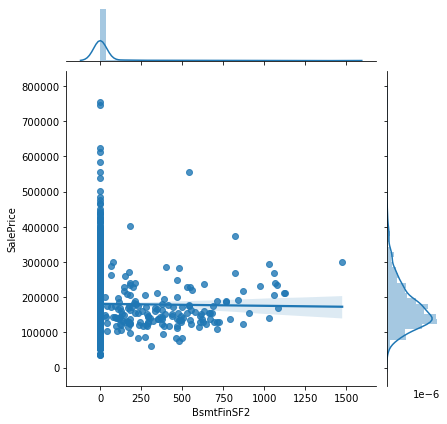

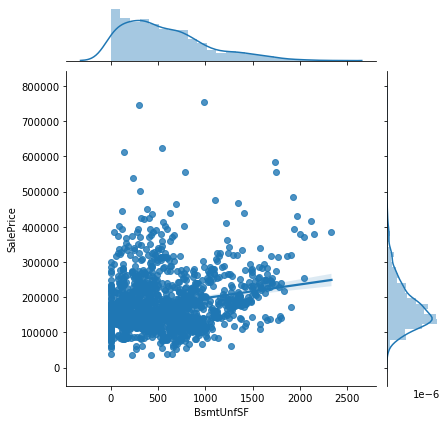

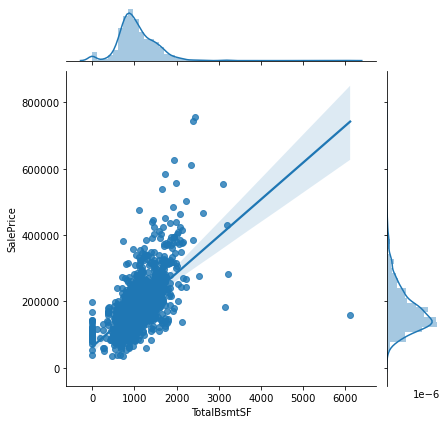

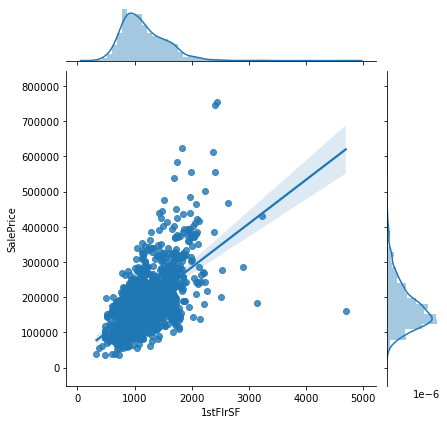

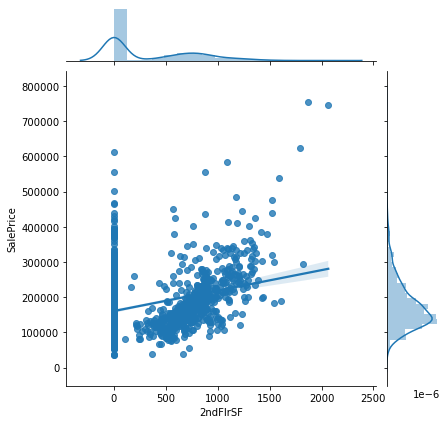

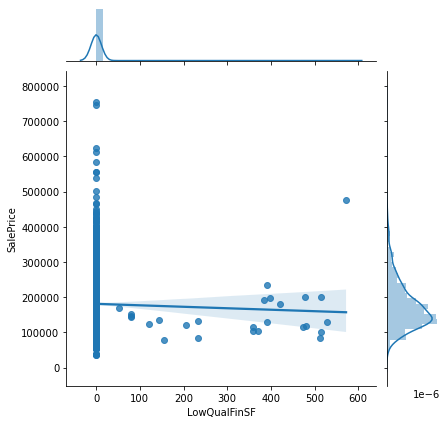

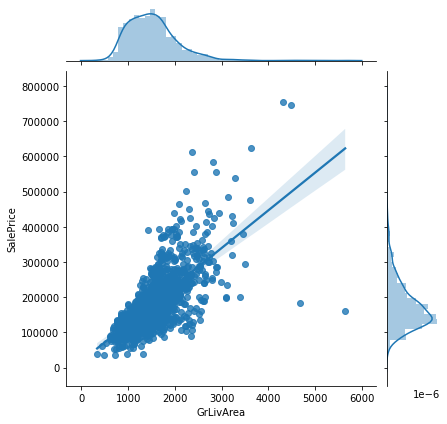

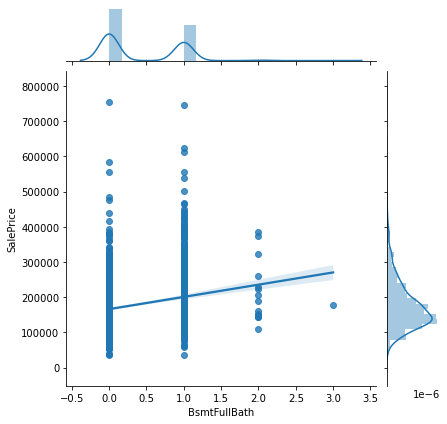

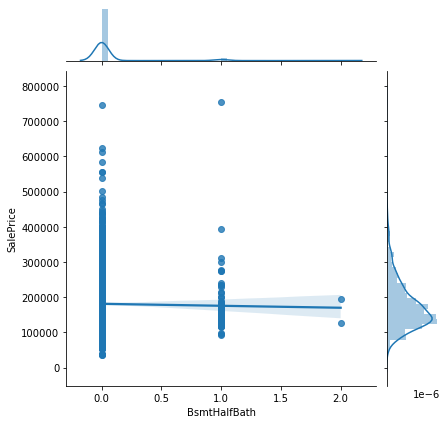

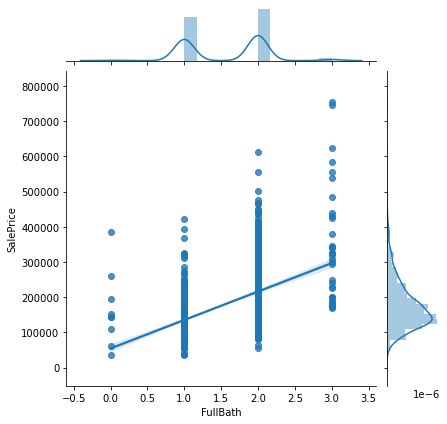

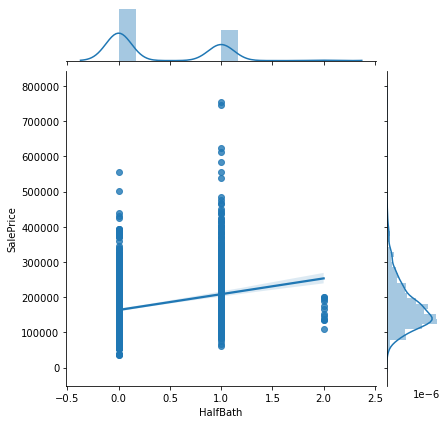

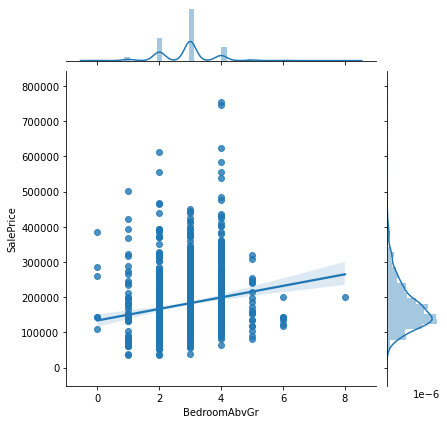

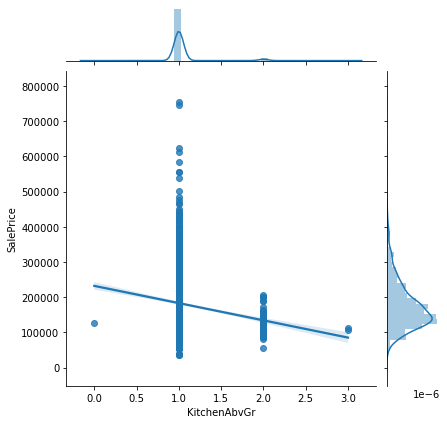

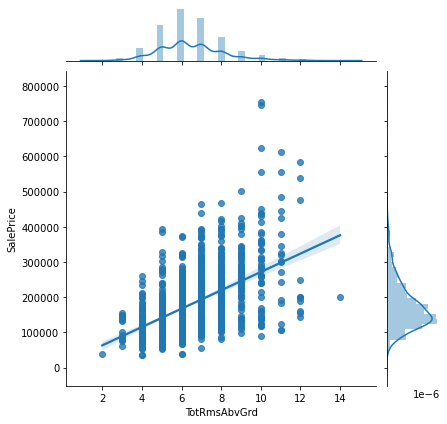

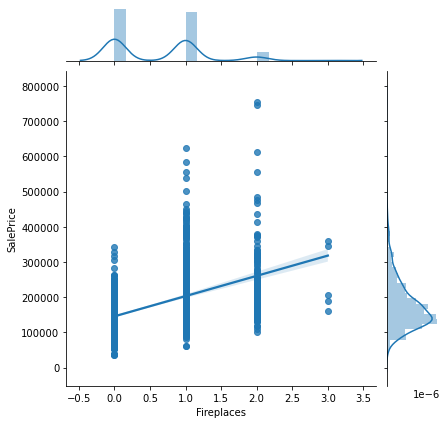

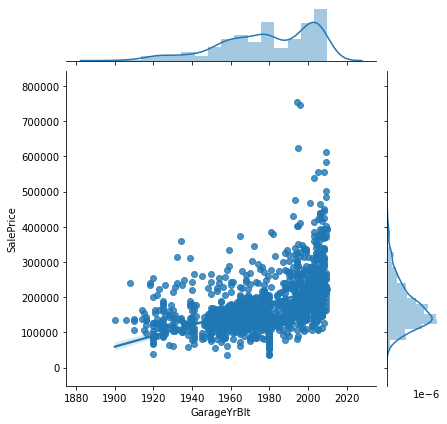

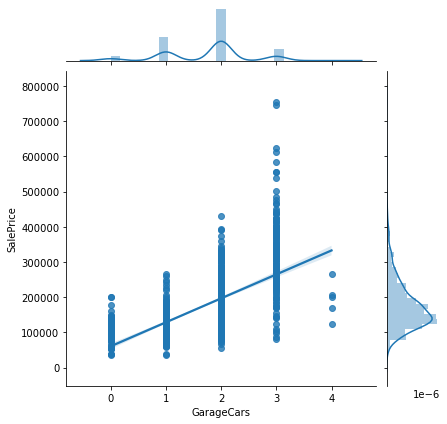

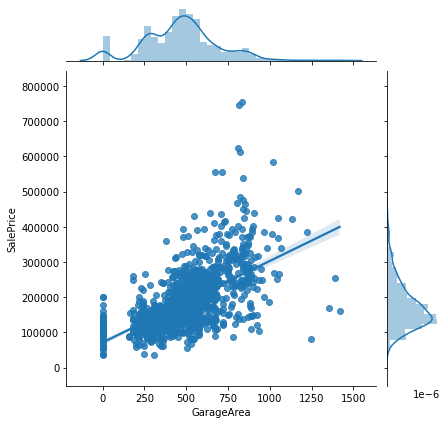

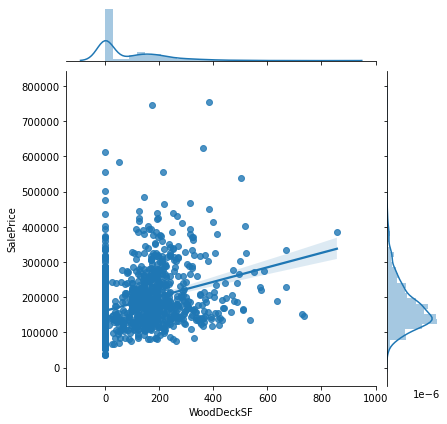

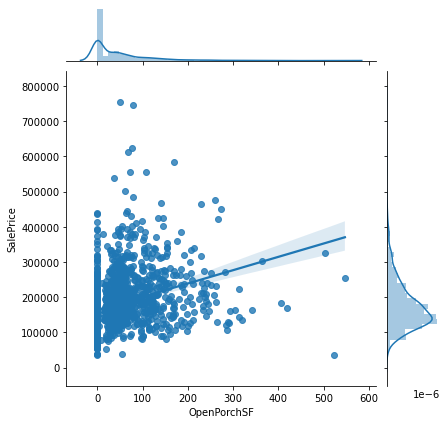

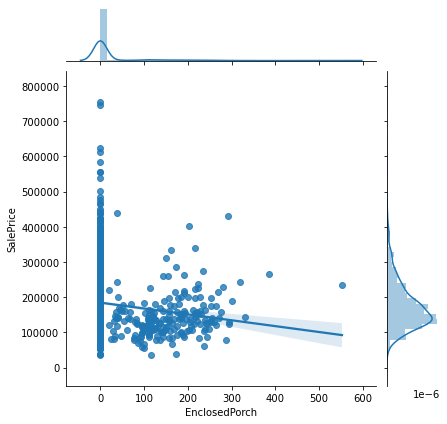

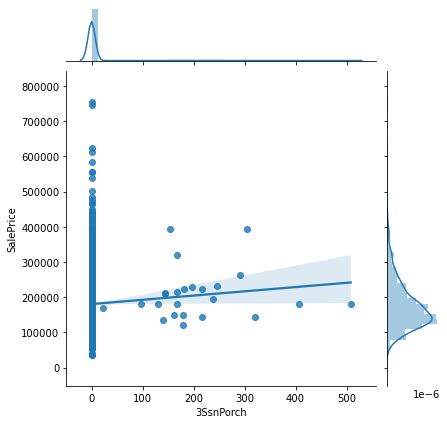

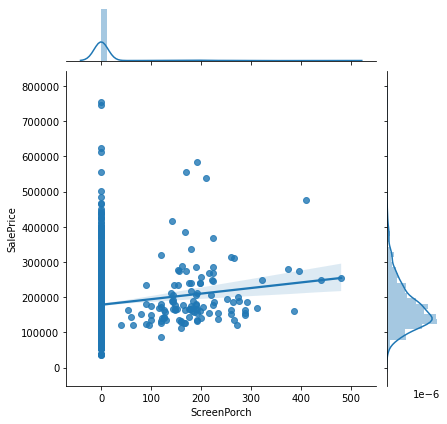

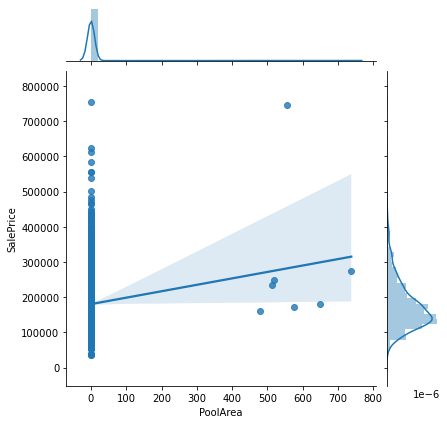

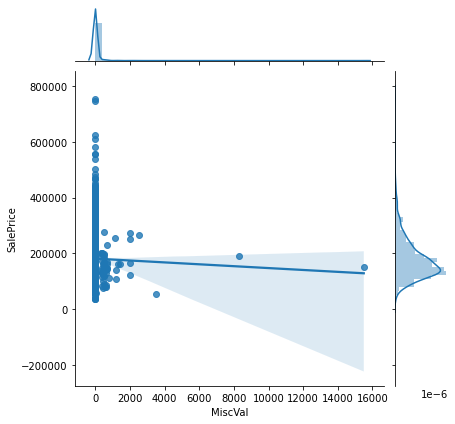

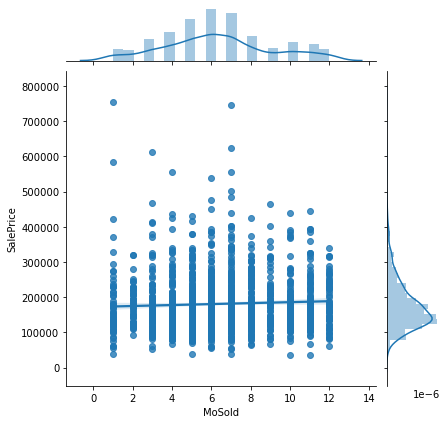

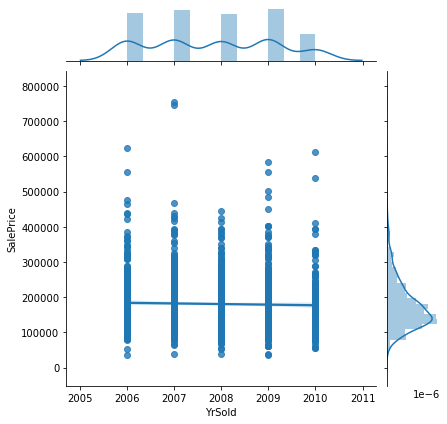

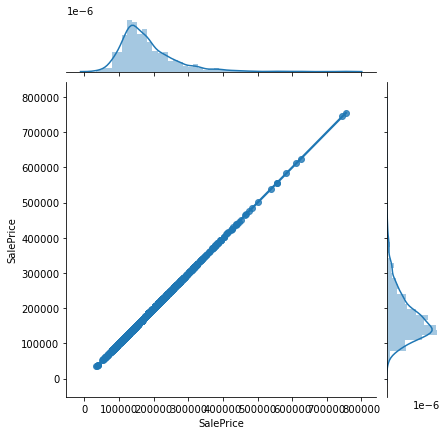

In [28]:
for i in outliers_col:
    sns.jointplot(train[i],train['SalePrice'],kind='reg')
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

## Remove Outliers from Numeric Columns

###  Remove Outliars from GrLivArea Columns

In [29]:
filt0 = train[(train['GrLivArea'] > 4500) & (train['SalePrice'] < 250000)]

In [30]:
filt0

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                         
524           60       RL    40094   Pave      IR1         Bnk    AllPub   
1299          60       RL    63887   Pave      IR3         Bnk    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                     
524     Inside       Gtl      Edwards       PosN       PosN     1Fam   
1299    Corner       Gtl      Edwards      Feedr       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                             
524      2Story           10            5       2007          2008       Hip   
1299     2Story           10            5       2008          2008       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                       
524   CompShg     CemntBd     CmentBd      Stone       762.0        Ex   
1299  ClyTile      Stucco      Stucco      Stone       796.0        Ex   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                      
524         TA      PConc       Ex       TA           Gd          GLQ   
1299        TA      PConc       Ex       TA           Gd          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                          
524         2260          Unf           0        878         3138    GasA   
1299        5644          Unf           0        466         6110    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                       
524         Ex          Y      SBrkr      3138      1538             0   
1299        Ex          Y      SBrkr      4692       950             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                              
524        4676             1             0         3         1             3   
1299       5642             2             0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
Id                                                                    
524              1          Ex            11        Typ           1   
1299             1          Ex            12        Typ           3   

     FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
Id                                                                              
524           Gd    BuiltIn       2007.0          Fin           3         884   
1299          Gd     Attchd       2008.0          Fin           2        1418   

     GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                                                                              
524          TA         TA          Y         208          406              0   
1299         TA         TA          Y         214          292              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType  \
Id                                                                         
524           0            0         0        0      10    2007      New   
1299          0            0       480        0       1    2008      New   

     SaleCondition  SalePrice  
Id                             
524        Partial     184750  
1299       Partial     160000

In [31]:
train.drop([524,1299],axis=0,inplace=True)

###  Remove Outliars from TotalBsmtSF Columns

In [32]:
filt01 =(train['TotalBsmtSF'] > 5000 ) & (train['SalePrice'] < 250000)

In [33]:
train.loc[filt01] #No Outliers Found

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

## Visualize Data After Removing Outliers 

In [34]:
print(train.shape)

(1458, 75)


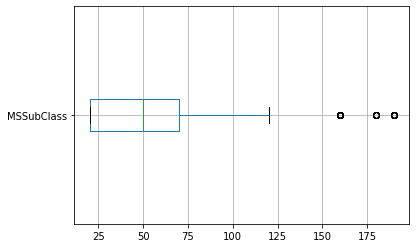

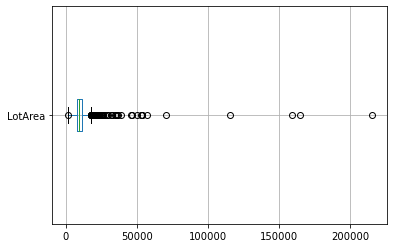

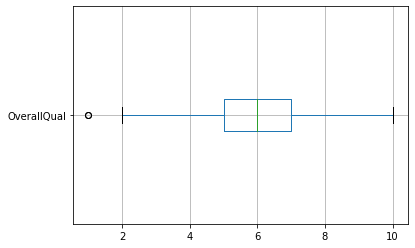

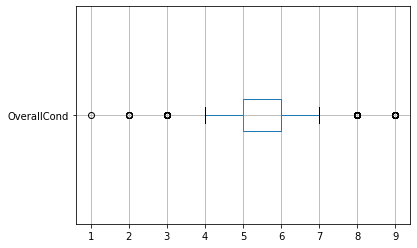

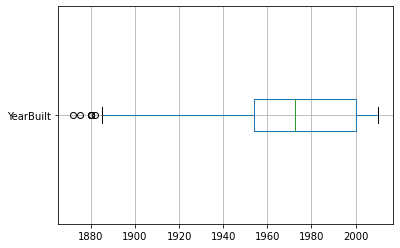

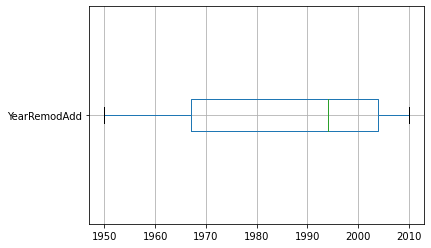

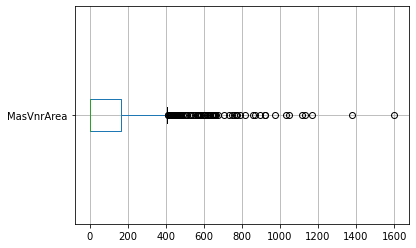

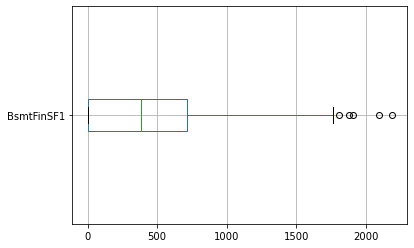

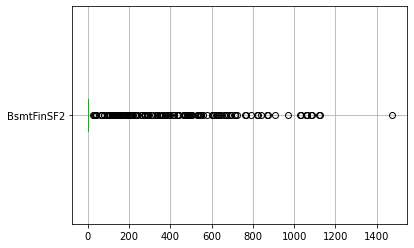

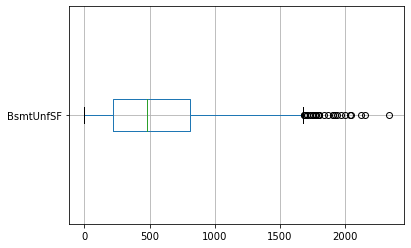

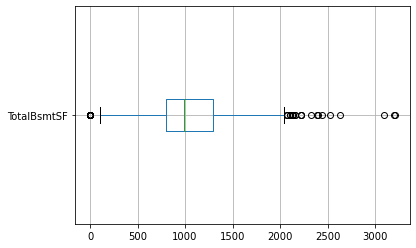

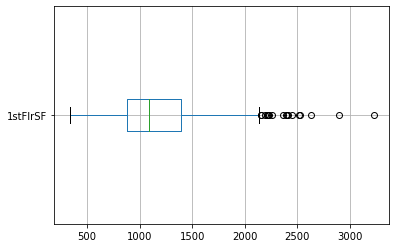

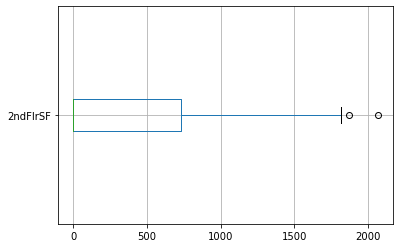

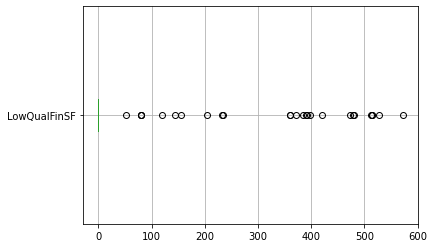

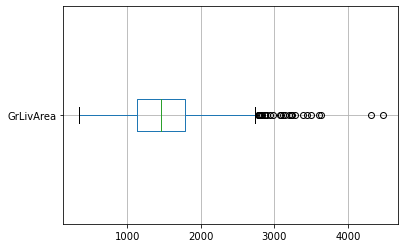

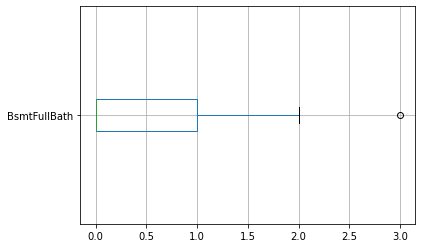

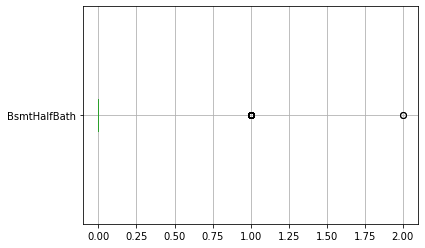

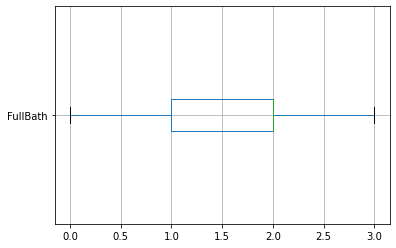

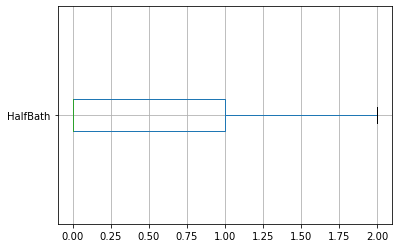

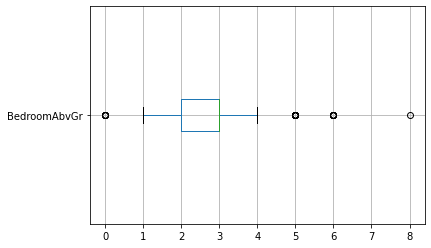

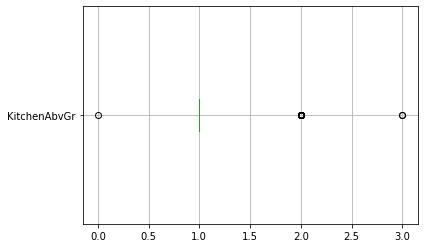

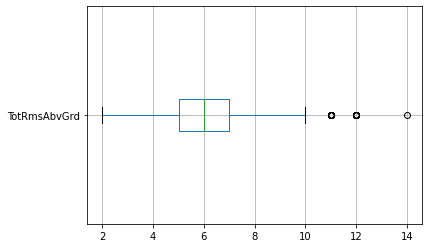

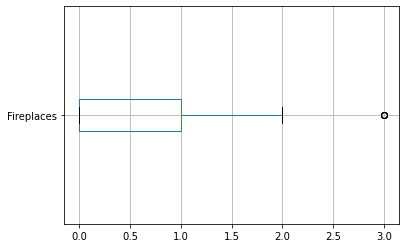

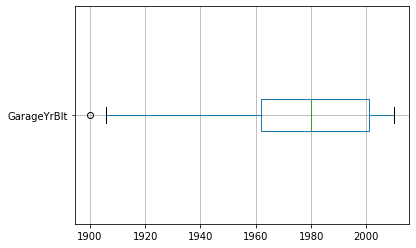

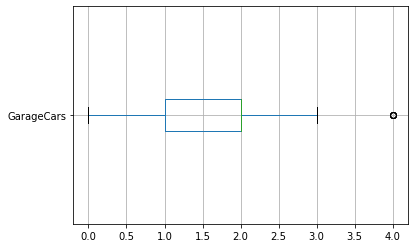

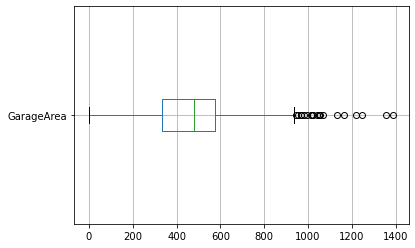

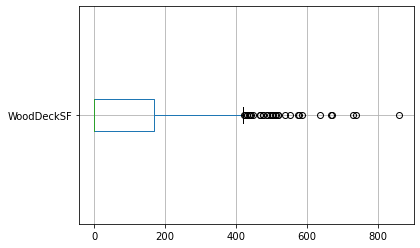

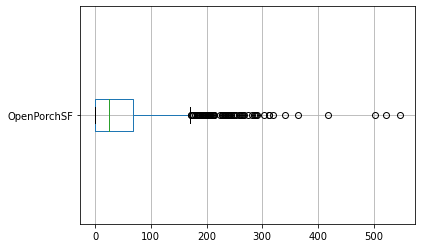

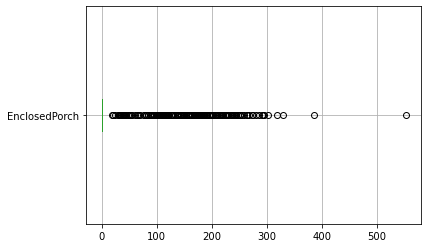

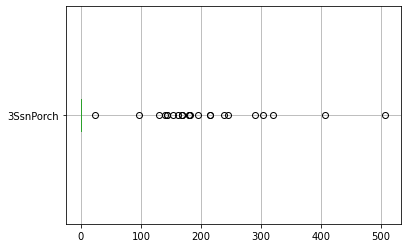

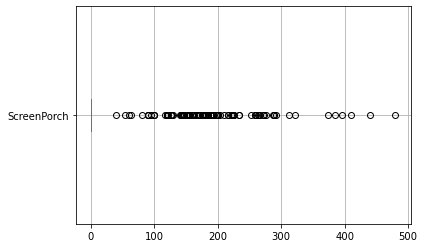

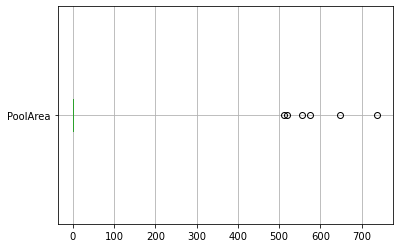

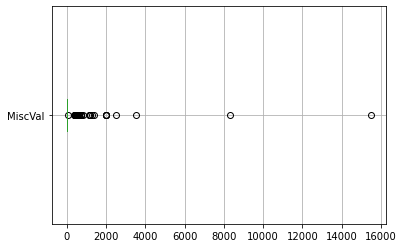

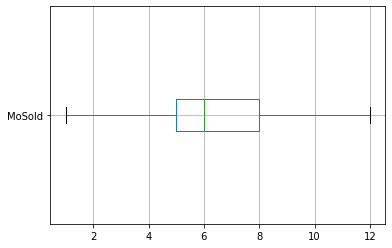

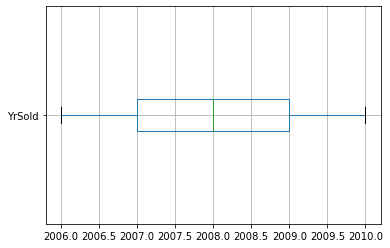

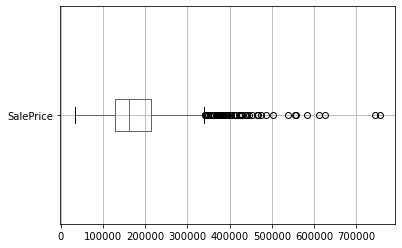

In [35]:
box_out = train.copy()
for feature in outliers_col:
    box_out.boxplot(feature,vert=False)
    plt.show()

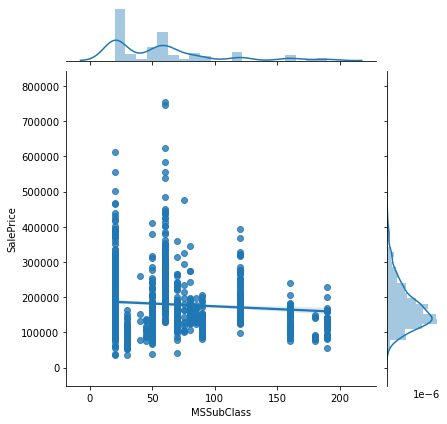

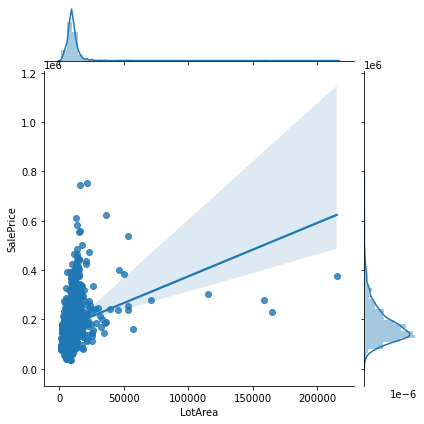

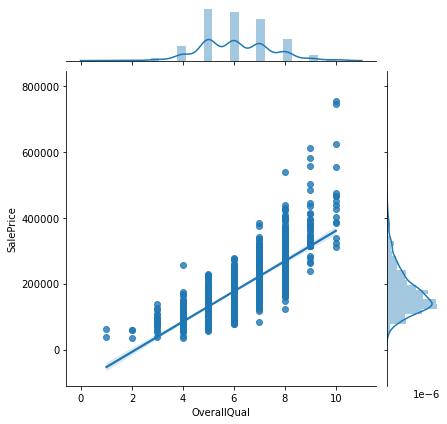

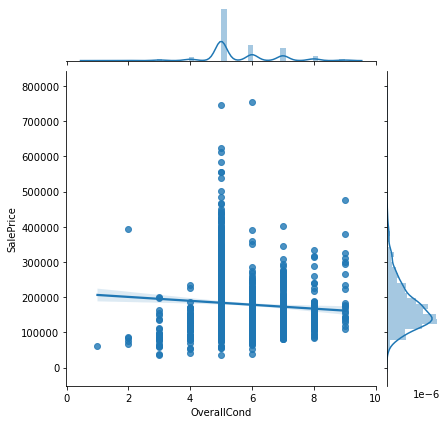

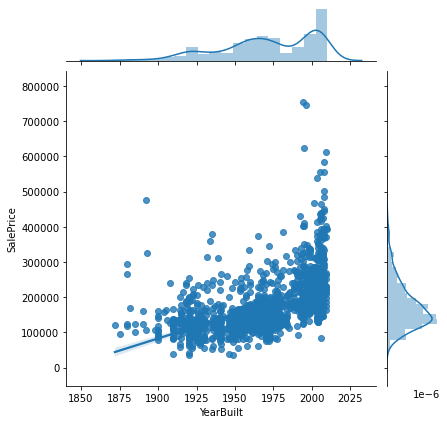

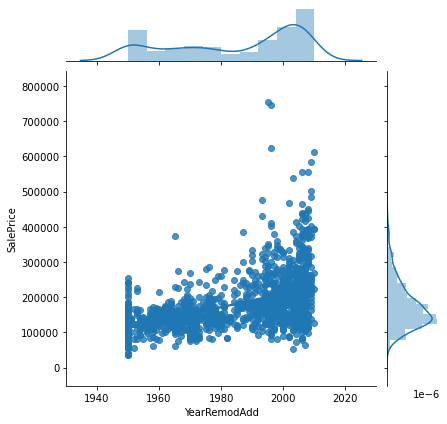

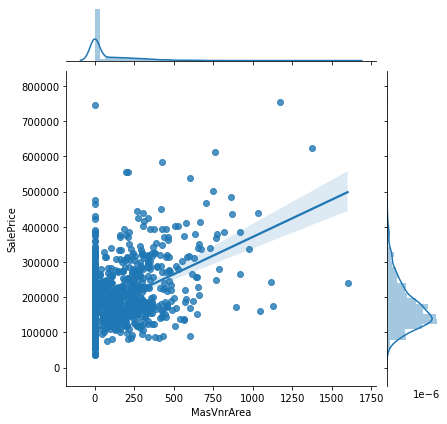

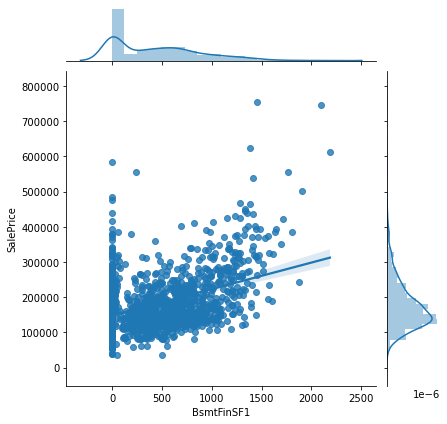

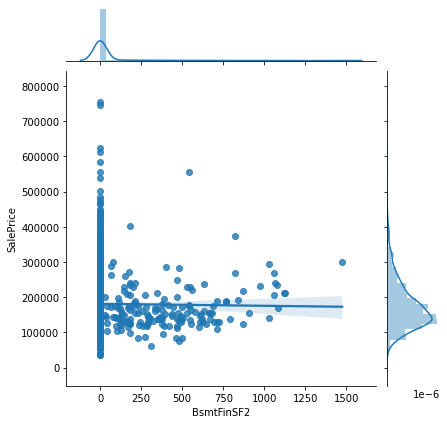

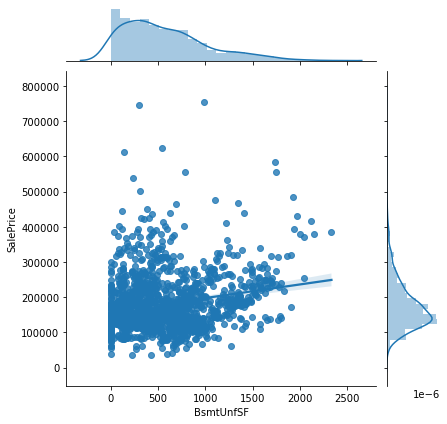

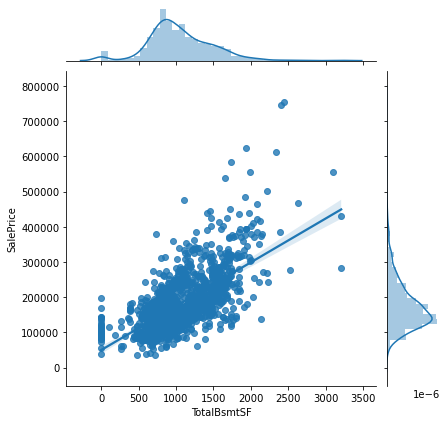

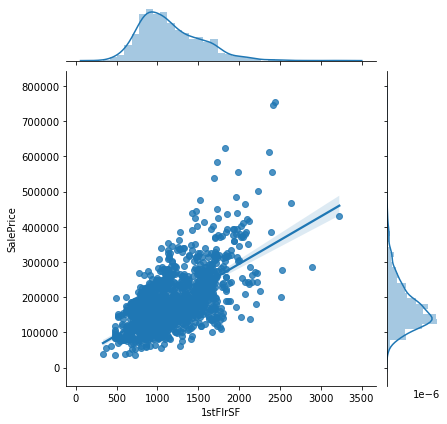

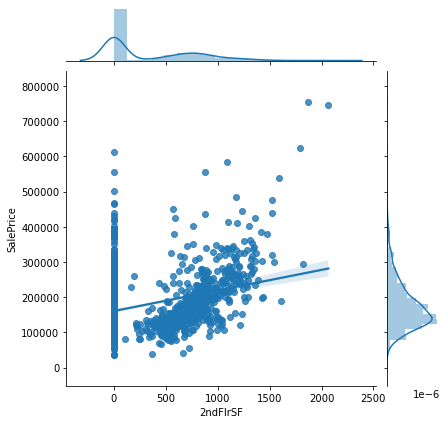

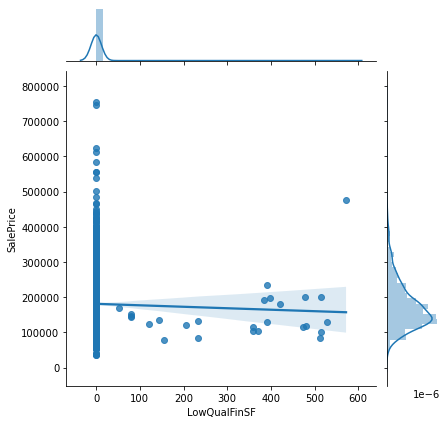

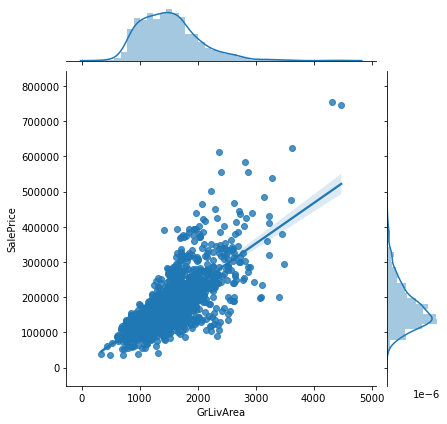

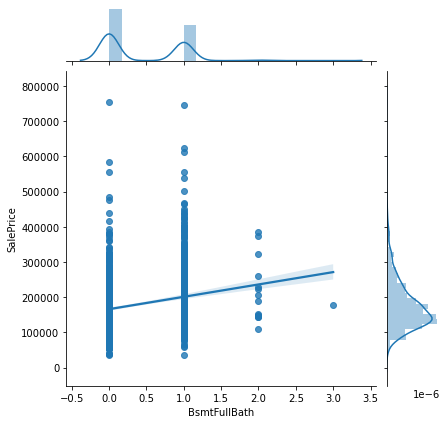

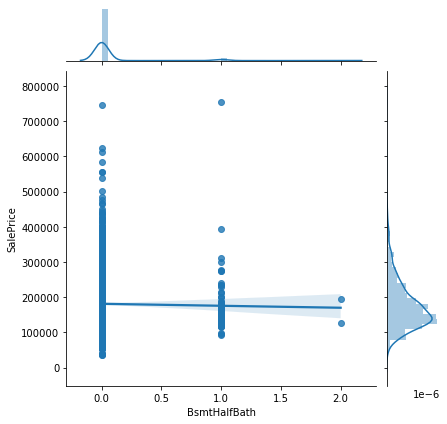

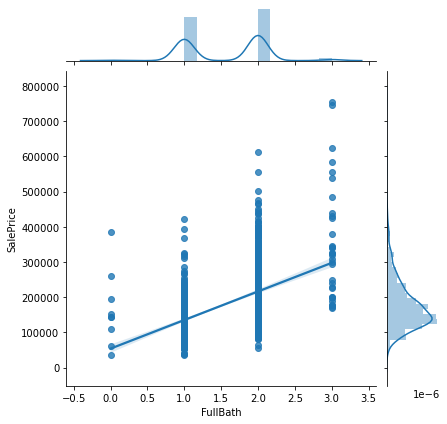

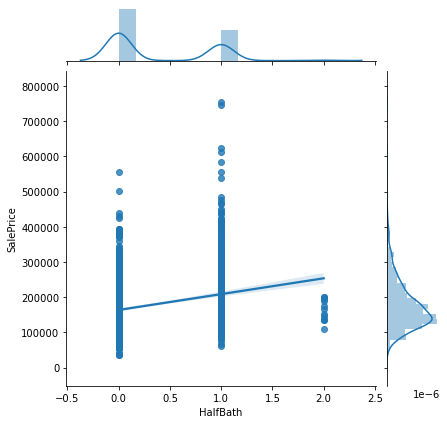

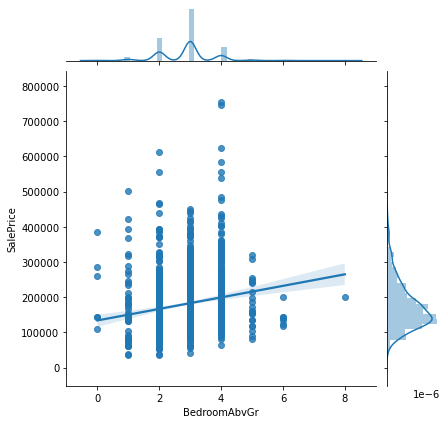

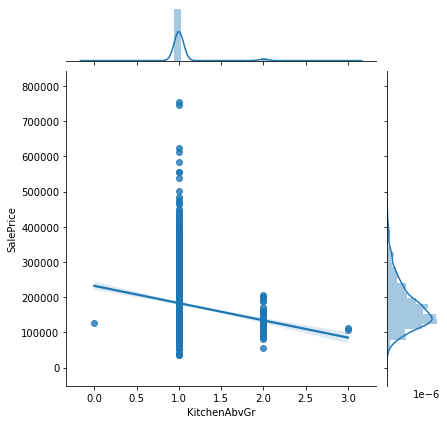

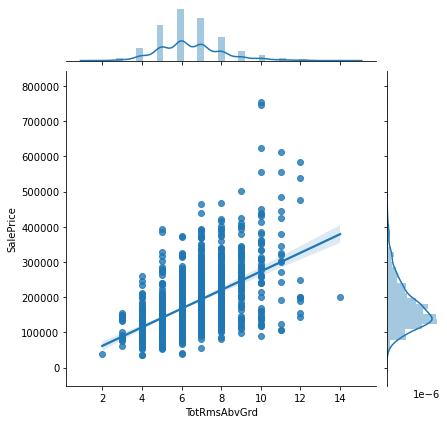

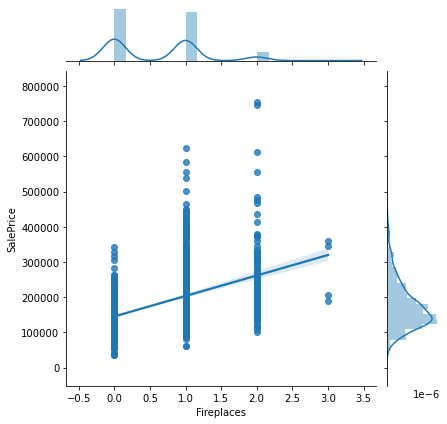

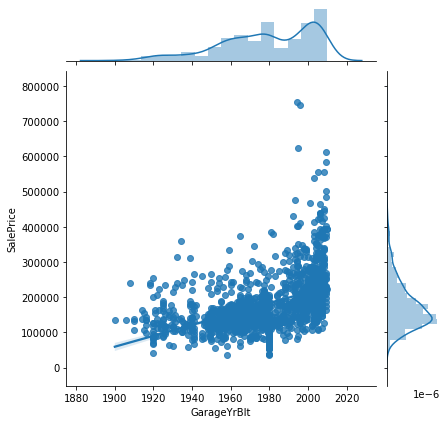

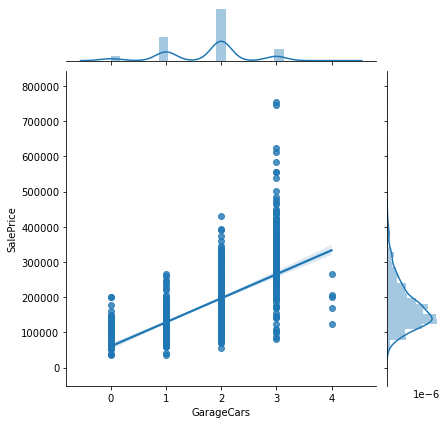

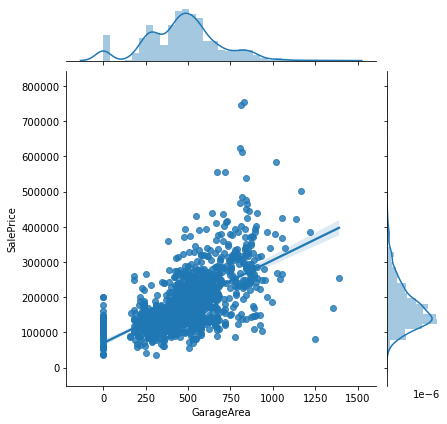

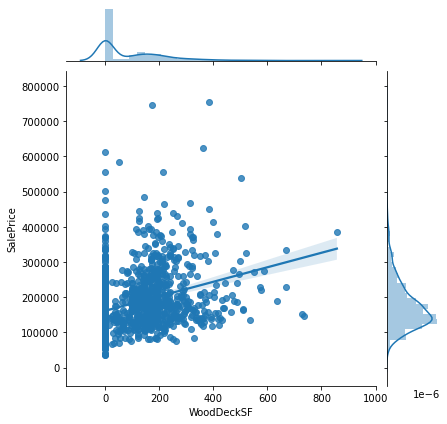

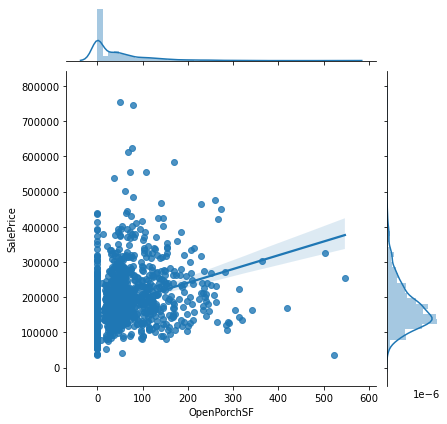

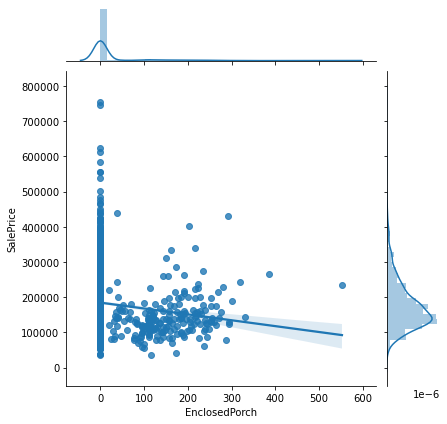

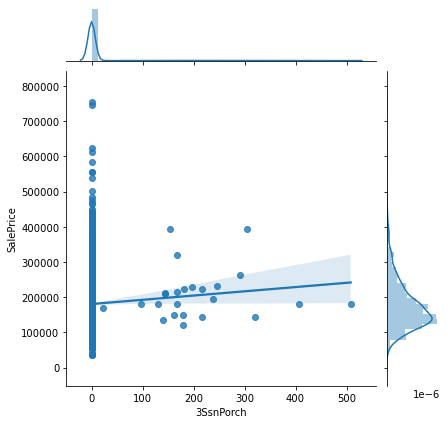

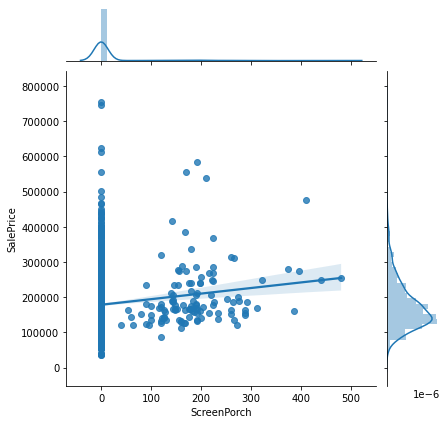

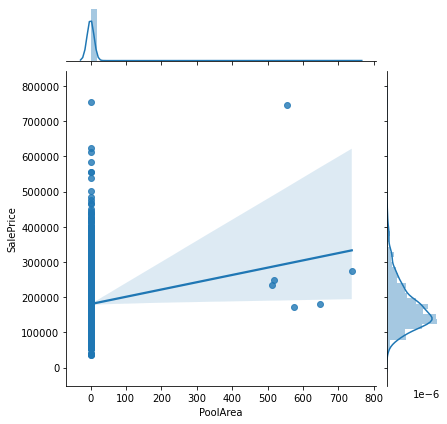

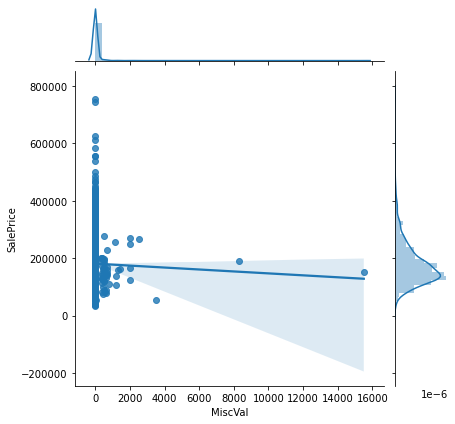

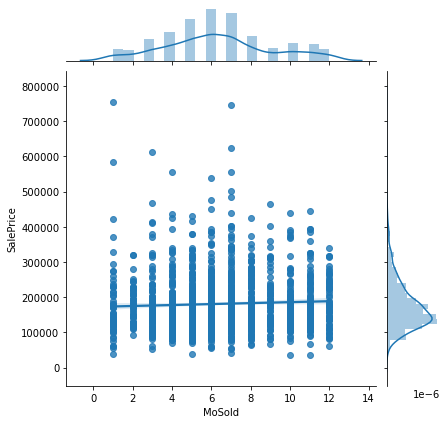

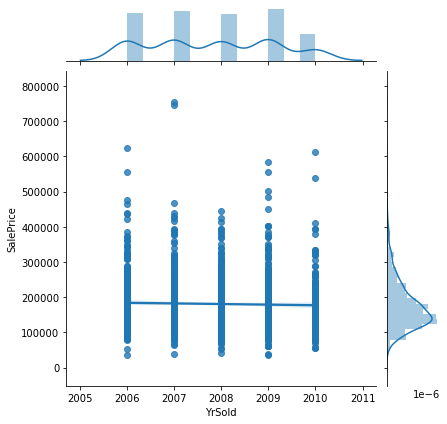

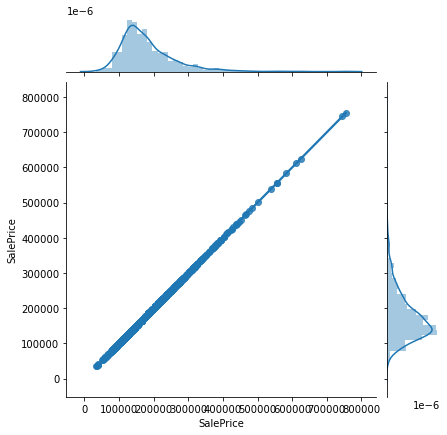

In [36]:
for i in outliers_col:
    sns.jointplot(box_out[i],box_out['SalePrice'],kind='reg')
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

## Step 3. Pearson Correlation Matrix for Checking Multicolinarity

In [37]:
cor= train.corr()
cor = cor.sort_values(by='SalePrice',ascending=False).round(2)
cols = cor['SalePrice'].index[:15]
cor = np.corrcoef(train[cols].values.T)
cor = np.tril(cor,k=1)


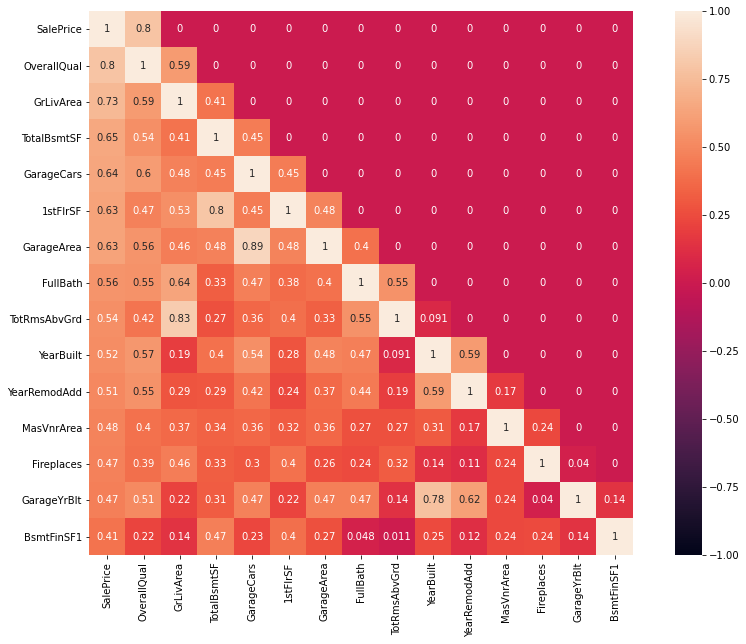

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,xticklabels=cols,yticklabels=cols,vmin=-1,vmax=1,square=True)
plt.show()


## Verify the Train dataset for any missing values present or not convert it to CSV File 

In [39]:
verify_miss=train.isnull().sum().sort_values(ascending=False)

In [40]:
verify_miss

SalePrice       0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
               ..
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
MSSubClass      0
Length: 75, dtype: int64

<AxesSubplot:>

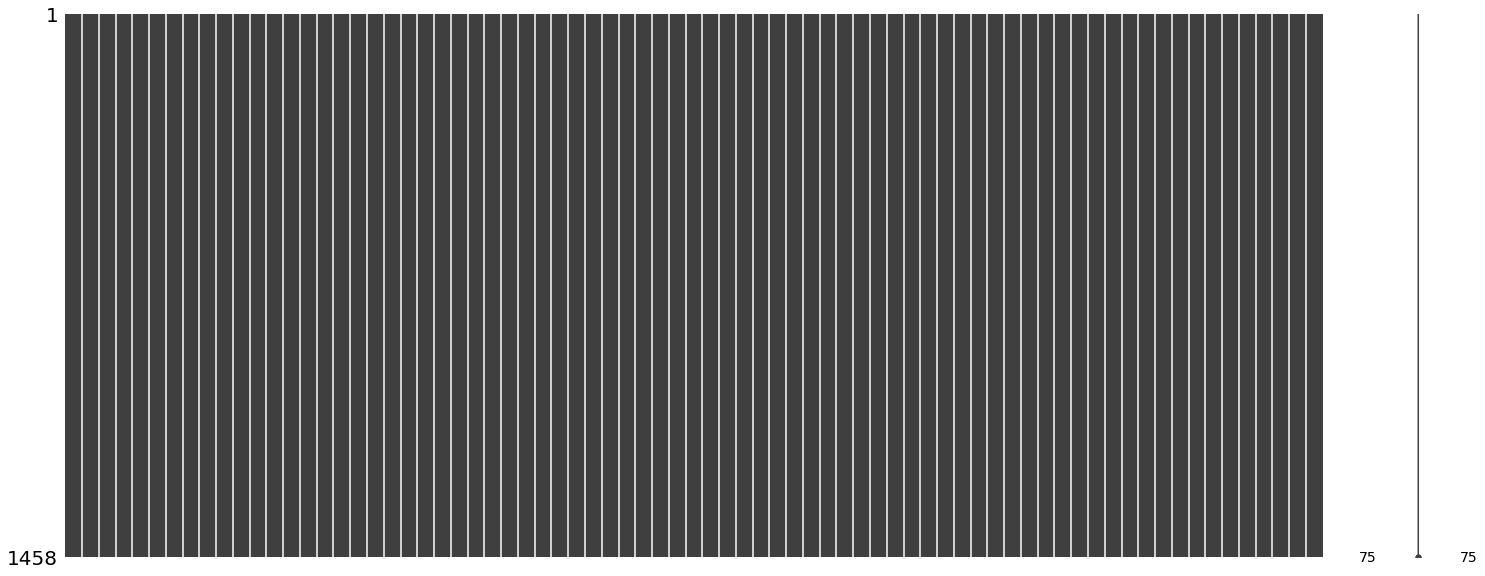

In [41]:
import missingno as msno
msno.matrix(train)

In [42]:
# by above image we can say there are no missing values in the dataset

## Step 4 File Convertion to CSV

In [43]:
train.head(4)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
Id                                                                              
1     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
2        FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
3     Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
4     Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
Id                                                                         
1             7            5       2003          2003     Gable  CompShg   
2             6            8       1976          1976     Gable  CompShg   
3             7            5       2001          2002     Gable  CompShg   
4             7            5       1915          1970     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
Id                                                                      
1      VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
2      MetalSd     MetalSd       None         0.0        TA        TA   
3      VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
4      Wd Sdng     Wd Shng       None         0.0        TA        TA   

   Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
Id                                                                      
1       PConc       Gd       TA           No          GLQ         706   
2      CBlock       Gd       TA           Gd          ALQ         978   
3       PConc       Gd       TA           Mn          GLQ         486   
4      BrkTil       TA       Gd           No          ALQ         216   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
Id                                                                      
1           Unf           0        150          856    GasA        Ex   
2           Unf           0        284         1262    GasA        Ex   
3           Unf           0        434          920    GasA        Ex   
4           Unf           0        540          756    GasA        Gd   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                      
1           Y      SBrkr       856       854             0       1710   
2           Y      SBrkr      1262         0             0       1262   
3           Y      SBrkr       920       866             0       1786   
4           Y      SBrkr       961       756             0       1717   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1              1             0         2         1             3   
2              0             1         2         0             3   
3              1             0         2         1             3   
4              1             0         1         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
Id                                                                              
1              1          Gd             8        Typ           0     Missing   
2              1          TA             6        Typ           1          TA   
3              1          Gd             6        Typ           1          TA   
4              1          Gd             7   

In [44]:
train.to_csv('train1.csv',index=False)

# #2. EDA for Test Dataset

### Understand the dataset 

In [45]:
test.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342   
std      30.390071     21.130467   177.625900   455.268042   176.753926   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   753.500000     0.000000   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean    554.294925  1046.117970  1156.534613   325.967786      3.543523   
std     437.260486   442.898624   398.165820   420.610226     44.043251   
min       0.000000     0.000000   407.000000     0.000000      0.000000   
25%     219.250000   784.000000   873.500000     0.000000      0.000000   
50%     460.000000   988.000000  1079.000000     0.000000      0.000000   
75%     797.750000  1305.000000  1382.500000   676.000000      0.000000   
max    2140.000000  5095.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   
mean   1486.045922      0.434454      0.065202     1.570939     0.377656   
std     485.566099      0.530648      0.252468     0.555190     0.503017   
min     407.000000      0.000000      0.000000     0.000000     0.000000   
25%    1117.500000      0.000000      0.000000     1.000000     0.000000   
50%    1432.000000      0.000000      0.000000     2.000000     0.000000   
75%    1721.000000      1.000000      0.000000     2.000000     1.000000   
max    5095.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000   
mean       2.854010      1.042495      6.385195     0.58122  1977.721217   
std        0.829788      0.208472      1.508895     0.64742    26.431175   
min        0.000000      0.000000      3.000000     0.00000  1895.000000   
25%        2.000000      1.000000      5.000000     0.00000  1959.000000   
50%        3.000000      1.000000      6.000000     0.00000  1979.000000   
75%        3.000000      1.000000      7.000000     1.00000  2002.000000   
max        6.000000      2.000000     15.000000     4.00000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000   
mean      1.766118   472.768861    93.174777    48.313914      24.243317   
std       0.775945   217.048611   127.744882    68.883364      67.227765   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   318.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    28.000000       0.000000   
75%       2.000000   576.000000   168.000000    72.000000       0.000000   
ma

In [46]:
test.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

## Step 1. Find Missing Values In  Numeric and Catagorical Feature

###  #1. Select Numeric Columns

In [47]:
# select all numeric columns
#num_col = [features for features in data.columns if data[features].dtypes != 'object']
num_col_test = test.select_dtypes(exclude='object').columns

In [48]:
len(num_col_test)

36

### Find Missing values in Numeric Columns

In [49]:
miss_val_test = [f for f in num_col_test if test[f].isnull().sum()>0 ]

In [50]:
miss_val_test

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

### Missing values Number & Percentage 

In [52]:
# miss_val.remove('SalePrice')
# miss_val
test[miss_val_test].isnull().sum()

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [54]:
for f in miss_val_test:
    print(f,'--->',test[f].isnull().sum(),'--->',np.round((test[f].isnull().sum()/len(test[f]))*100,3))

LotFrontage ---> 227 ---> 15.559
MasVnrArea ---> 15 ---> 1.028
BsmtFinSF1 ---> 1 ---> 0.069
BsmtFinSF2 ---> 1 ---> 0.069
BsmtUnfSF ---> 1 ---> 0.069
TotalBsmtSF ---> 1 ---> 0.069
BsmtFullBath ---> 2 ---> 0.137
BsmtHalfBath ---> 2 ---> 0.137
GarageYrBlt ---> 78 ---> 5.346
GarageCars ---> 1 ---> 0.069
GarageArea ---> 1 ---> 0.069


## Fill missing val in Numeric Columns Data

In [55]:
for feature in miss_val_test:
    if feature != 'LotFrontage':
        median_val= test[feature].median()
        test[feature].fillna(median_val,inplace=True)

test.drop('LotFrontage',axis=1,inplace=True)


In [56]:
miss_val_test.remove('LotFrontage')
miss_val_test

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

### Verify the Train dataset is there any Missing values present 

In [57]:
test[miss_val_test].isnull().sum().sort_values(ascending=False)

GarageArea      0
GarageCars      0
GarageYrBlt     0
BsmtHalfBath    0
BsmtFullBath    0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
MasVnrArea      0
dtype: int64

## #2.Catagorical Missing Values

###  Select Catagorical columns

In [58]:
cat_col_test = test.select_dtypes(include='object').columns

In [59]:
len(cat_col_test)

43

## Missing Values and percentage of Missing values in Catagorical columns

In [60]:
for f in cat_col_test:
    if test[f].isnull().sum() > 0:
        
      
        print(f,'--->',test[f].isnull().sum(),'--->',np.round((test[f].isnull().mean())*100,2),'--->','%','\n')

MSZoning ---> 4 ---> 0.27 ---> % 

Alley ---> 1352 ---> 92.67 ---> % 

Utilities ---> 2 ---> 0.14 ---> % 

Exterior1st ---> 1 ---> 0.07 ---> % 

Exterior2nd ---> 1 ---> 0.07 ---> % 

MasVnrType ---> 16 ---> 1.1 ---> % 

BsmtQual ---> 44 ---> 3.02 ---> % 

BsmtCond ---> 45 ---> 3.08 ---> % 

BsmtExposure ---> 44 ---> 3.02 ---> % 

BsmtFinType1 ---> 42 ---> 2.88 ---> % 

BsmtFinType2 ---> 42 ---> 2.88 ---> % 

KitchenQual ---> 1 ---> 0.07 ---> % 

Functional ---> 2 ---> 0.14 ---> % 

FireplaceQu ---> 730 ---> 50.03 ---> % 

GarageType ---> 76 ---> 5.21 ---> % 

GarageFinish ---> 78 ---> 5.35 ---> % 

GarageQual ---> 78 ---> 5.35 ---> % 

GarageCond ---> 78 ---> 5.35 ---> % 

PoolQC ---> 1456 ---> 99.79 ---> % 

Fence ---> 1169 ---> 80.12 ---> % 

MiscFeature ---> 1408 ---> 96.5 ---> % 

SaleType ---> 1 ---> 0.07 ---> % 



## Handle missing Values in Calagorical Dataset

### Fill Nan values by 'Missing' String and Drop columns which has more than 80% Missing values

In [61]:
for feature in cat_col_test:
    if test[feature].isnull().mean() > 0.8:
        print('drop column name:',feature)
        test.drop(feature,axis=1,inplace=True)
    else:
        test[feature].fillna('Missing',inplace=True)
    

drop column name: Alley
drop column name: PoolQC
drop column name: Fence
drop column name: MiscFeature


## # Verify the dataset is there any missing values present or not in Catagorical dataset 

In [62]:
for f in test.columns:
    if  test[f].isnull().sum() > 0:
        print(f'There are null values in {f}')
else:
    print('there are no null values present')

there are no null values present


## Verify the Train dataset for any missing values present or not convert it to CSV File 

In [67]:
verify_miss_test=test.isnull().sum().sort_values(ascending=False)

In [68]:
verify_miss_test

SaleCondition    0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
MSSubClass       0
Length: 74, dtype: int64

<AxesSubplot:>

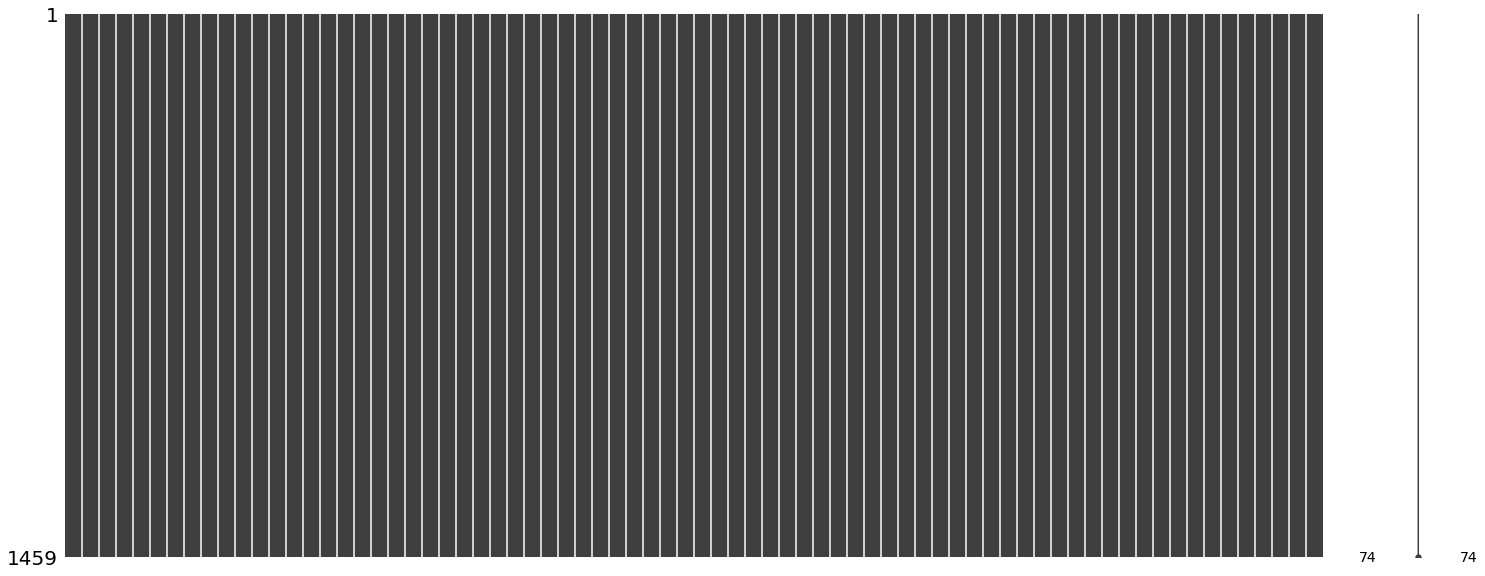

In [69]:
import missingno as msno
msno.matrix(test)

In [70]:
# by above image we can say there are no missing values in the dataset

## Step 4 File Convertion to CSV

In [71]:
test.head(4)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                         
1461          20       RH    11622   Pave      Reg         Lvl    AllPub   
1462          20       RL    14267   Pave      IR1         Lvl    AllPub   
1463          60       RL    13830   Pave      IR1         Lvl    AllPub   
1464          60       RL     9978   Pave      IR1         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                     
1461    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
1462    Corner       Gtl        NAmes       Norm       Norm     1Fam   
1463    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1464    Inside       Gtl      Gilbert       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
Id                                                                             
1461     1Story            5            6       1961          1961     Gable   
1462     1Story            6            6       1958          1958       Hip   
1463     2Story            5            5       1997          1998     Gable   
1464     2Story            6            6       1998          1998     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
Id                                                                       
1461  CompShg     VinylSd     VinylSd       None         0.0        TA   
1462  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA   
1463  CompShg     VinylSd     VinylSd       None         0.0        TA   
1464  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
Id                                                                      
1461        TA     CBlock       TA       TA           No          Rec   
1462        TA     CBlock       TA       TA           No          ALQ   
1463        TA      PConc       Gd       TA           No          GLQ   
1464        TA      PConc       TA       TA           No          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
Id                                                                          
1461       468.0          LwQ       144.0      270.0        882.0    GasA   
1462       923.0          Unf         0.0      406.0       1329.0    GasA   
1463       791.0          Unf         0.0      137.0        928.0    GasA   
1464       602.0          Unf         0.0      324.0        926.0    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                       
1461        TA          Y      SBrkr       896         0             0   
1462        TA          Y      SBrkr      1329         0             0   
1463        Gd          Y      SBrkr       928       701             0   
1464        Ex          Y      SBrkr       926       678             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                              
1461        896           0.0           0.0         1         0             2   
1462       1329           0.0           0.0         1         1             3   
1463       1629           0.0           0.0         2         1             3   
1464       1604           0.0           0.0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
Id                                                                    
1461             1          TA             5        Typ           0   
1462             1          Gd             6        Typ           0   
1463             1          TA             6        Typ           1   
1

In [72]:
test.to_csv('test1.csv',index=False)

# Feature Enginnering

### Read CSV File.

In [73]:
d1 = pd.read_csv('data\\house_price_prediction\\train1.csv')
d2 = pd.read_csv('data\\house_price_prediction\\test1.csv')

In [74]:
print(d1.shape)
print(d2.shape)

(1458, 75)
(1459, 74)


### Make a copy of train and test so we can revert back on original back 

In [75]:
train = d1.copy()
test = d2.copy()


### Concat train and test Dataframe for easyness

In [76]:
df= pd.concat((train,test),axis=0)

In [77]:
df.reset_index(drop=True,inplace=True)

## Checked for Duplicated Rows

In [78]:
df[df.duplicated()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

## Checked for Duplicated Columns

In [79]:
df.loc[:,~df.columns.duplicated()]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
2912         160       RM     1936   Pave      Reg         Lvl    AllPub   
2913         160       RM     1894   Pave      Reg         Lvl    AllPub   
2914          20       RL    20000   Pave      Reg         Lvl    AllPub   
2915          85       RL    10441   Pave      Reg         Lvl    AllPub   
2916          60       RL     9627   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
2912    Inside       Gtl      MeadowV       Norm       Norm    Twnhs   
2913    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE   
2914    Inside       Gtl      Mitchel       Norm       Norm     1Fam   
2915    Inside       Gtl      Mitchel       Norm       Norm     1Fam   
2916    Inside       Mod      Mitchel       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
2912     2Story            4            7       1970          1970     Gable   
2913     2Story            4            5       1970          1970     Gable   
2914     1Story            5            7       1960          1996     Gable   
2915     SFoyer            5            5       1992          1992     Gable   
2916     2Story            7            5       1993          1994     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
2912  CompShg     CemntBd     CmentBd       None         0.0        TA   
2913  CompShg     CemntBd     CmentBd       None         0.0        TA   
2914  CompShg     VinylSd     VinylSd       None         0.0        TA   
2915  CompShg     HdBoard     Wd Shng       None         0.0        TA   
2916  CompShg     HdBoard     HdBoard    BrkFace        94.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           T

###  Check Dataframe for null values 
#### No null values Found

In [80]:
df.isnull().sum().sort_values(ascending=False)[:10]

SalePrice      1459
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
dtype: int64

<AxesSubplot:>

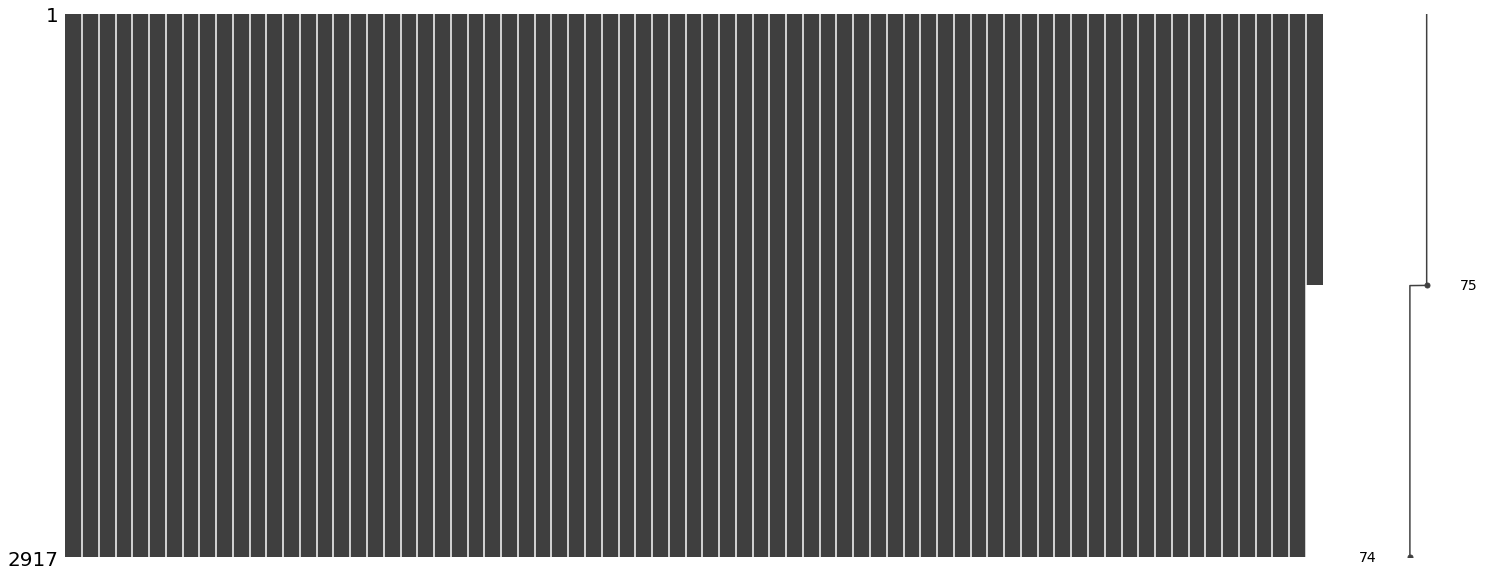

In [81]:
import missingno as msno
msno.matrix(df)

In [82]:
#no missing values found except saleprice columns because test has no values in saleprice column

## Columns Merging 

In [84]:
#as we know some feature are highly co-related with SalePrice so lets create some feature using these features
df['OverallQual_2']=df['OverallQual']**2
df['OverallQual_3']=df['OverallQual']**3
df['OverallQual_4']=df['OverallQual']**4

df['GrLivArea_2']=df['GrLivArea']**2
df['GrLivArea_3']=df['GrLivArea']**3
df['GrLivArea_4']=df['GrLivArea']**4

df['TotalBsmtSF_2']=df['TotalBsmtSF']**2
df['TotalBsmtSF_3']=df['TotalBsmtSF']**3
df['TotalBsmtSF_4']=df['TotalBsmtSF']**4

df['GarageCars_2']=df['GarageCars']**2
df['GarageCars_3']=df['GarageCars']**3
df['GarageCars_4']=df['GarageCars']**4

df['1stFlrSF_2']=df['1stFlrSF']**2
df['1stFlrSF_3']=df['1stFlrSF']**3
df['1stFlrSF_4']=df['1stFlrSF']**4

df['GarageArea_2']=df['GarageArea']**2
df['GarageArea_3']=df['GarageArea']**3
df['GarageArea_4']=df['GarageArea']**4

In [85]:
#lets add 1stFlrSF and 2ndFlrSF and create new feature floorfeet
df['TotalFlrSF']=df['TotalBsmtSF']+ df['1stFlrSF']+df['2ndFlrSF']
df=df.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],1)

In [86]:
#lets add all bath in one feature
df['Bath']=df['BsmtFullBath']+df['BsmtHalfBath']*.5+df['FullBath']+df['HalfBath']*.5
df=df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],1)

##  Handal All Categorical Data to Numeric Using One hot Encoding ( Dummy variables)

In [87]:
cat_col = [i for i in df.columns if df[i].dtype =='object']

### See All Unique values in catagorical column 

In [89]:
for f in cat_col:
    print(train[f].unique())
    print('\n')

['RL' 'RM' 'C (all)' 'FV' 'RH']


['Pave' 'Grvl']


['Reg' 'IR1' 'IR2' 'IR3']


['Lvl' 'Bnk' 'Low' 'HLS']


['AllPub' 'NoSeWa']


['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


['Gtl' 'Mod' 'Sev']


['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']


['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']


['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


['VinylSd' 'MetalSd' 'Wd Shng'

In [90]:
df1 = df.copy()
for c in cat_col:
    dummy = pd.get_dummies(df1[c],drop_first=True,prefix =c)
    df1 = df1.join(dummy)
    
df1.drop(cat_col,axis=1,inplace=True)




In [91]:
data = df1.copy()

In [93]:
data.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  GrLivArea  \
0       196.0       706.0         0.0      150.0             0       1710   
1         0.0       978.0         0.0      284.0             0       1262   
2       162.0       486.0         0.0      434.0             0       1786   
3         0.0       216.0         0.0      540.0             0       1717   
4       350.0       655.0         0.0      490.0             0       2198   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0             3             1             8           0       2003.0   
1             3             1             6           1       1976.0   
2             3             1             6           1       2001.0   
3             3             1             7           1       1998.0   
4             4             1             9           1       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2.0       548.0           0           61              0          0   
1         2.0       460.0         298            0              0          0   
2         2.0       608.0           0           42              0          0   
3         3.0       642.0           0           35            272          0   
4         3.0       836.0         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  OverallQual_2  \
0            0         0        0       2    2008   208500.0             49   
1            0         0        0       5    2007   181500.0             36   
2            0         0        0       9    2008   223500.0             49   
3            0         0        0       2    2006   140000.0             49   
4            0         0        0      12    2008   250000.0             64   

   OverallQual_3  OverallQual_4  GrLivArea_2  GrLivArea_3     GrLivArea_4  \
0            343           2401      2924100   5000211000   8550360810000   
1            216           1296      1592644   2009916728   2536514910736   
2            343           2401      3189796   5696975656  10174798521616   
3            343           2401      2948089   5061868813   8691228751921   
4            512           4096      4831204  10618986392  23340532089616   

   TotalBsmtSF_2  TotalBsmtSF_3  TotalBsmtSF_4  GarageCars_2  GarageCars_3  \
0       732736.0   6.272220e+08   5.369020e+11           4.0           8.0   
1      1592644.0   2.009917e+09   2.536515e+12           4.0           8.0   
2       846400.0   7.786880e+08   7.163930e+11           4.0           8.0   
3       571536.0   4.320812e+08   3.266534e+11           9.0          27.0   
4      1311025.0   1.501124e+09   1.718787e+12           9.0          27.0   

   GarageCars_4  1stFlrSF_2  1stFlrSF_3     1stFlrSF_4  GarageArea_2  \
0          16.0      732736   627222016   536902045696      300304.0   
1          16.0     1592644  2009916728  2536514910736      211600.0   
2          16.0      846400   778688000   716392960000      369664.0   
3          81.0      923521   887503681   852891037441      412164.0   
4          81.0     1311025  1501123625  1718786550625      698896.0   

   GarageArea_3  GarageArea_4  TotalFlrSF  Bath  MSZoning_FV  \
0   164566592.0  9.018249e+10      2566.0   3.5            0   
1    97336000.0  4.477456e+10      2524.0   2.5            0   
2   224755712.0  1.366515e+11      2706.0   3.5            0   
3   264609288.0  1.698792e+11      2473.0   2.0            0   
4  

## Divide data further into train and test 

In [94]:
data_train = data.loc[:1457,:]
data_test = data.iloc[1458:,:]
data_test = data_test.drop('SalePrice',axis=1)



In [95]:
print(data_train.shape)
print(data_test.shape)

(1458, 267)
(1459, 266)


In [96]:
print(data_train.shape)
print(data_test.shape)

(1458, 267)
(1459, 266)


# Model Building

###  Import all Scikit-Learn Library for model building

In [98]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_regression



In [99]:
X = data_train.iloc[:,:]
X=X.drop('SalePrice',axis=1)
y = data_train.loc[:,'SalePrice']


### train-test-split

In [100]:
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.7)

In [102]:
train_X.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1001          20    11957            8            5       2006          2006   
1326          50    10440            6            7       1920          1950   
230           20     8760            6            6       1959          1959   
524           20     7500            7            5       2005          2005   
770           20     8877            4            5       1951          1951   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  GrLivArea  \
1001        53.0        24.0         0.0     1550.0             0       1574   
1326         0.0       493.0         0.0     1017.0             0       2792   
230        220.0         0.0         0.0     1194.0             0       1194   
524          0.0         0.0         0.0     1257.0             0       1266   
770          0.0       836.0         0.0        0.0             0       1220   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
1001             3             1             7           1       2006.0   
1326             5             1             8           2       1920.0   
230              3             1             6           0       1959.0   
524              3             1             6           1       2005.0   
770              2             1             6           0       1951.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1001         3.0       824.0         144          104              0   
1326         2.0       520.0           0          547              0   
230          1.0       312.0           0            0            120   
524          2.0       453.0          38          144              0   
770          2.0       396.0           0            0              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
1001          0            0         0        0       7    2008   
1326          0          480         0     1150       6    2008   
230           0            0         0        0       4    2010   
524           0            0         0        0       4    2006   
770           0            0         0        0       4    2006   

      OverallQual_2  OverallQual_3  OverallQual_4  GrLivArea_2  GrLivArea_3  \
1001             64            512           4096      2477476   3899547224   
1326             36            216           1296      7795264  21764377088   
230              36            216           1296      1425636   1702209384   
524              49            343           2401      1602756   2029089096   
770              16             64            256      1488400   1815848000   

         GrLivArea_4  TotalBsmtSF_2  TotalBsmtSF_3  TotalBsmtSF_4  \
1001   6137887330576      2477476.0   3.899547e+09   6.137887e+12   
1326  60766140829696      2280100.0   3.442951e+09   5.198856e+12   
230    2032438004496      1425636.0   1.702209e+09   2.032438e+12   
524    2568826795536      1580049.0   1.986122e+09   2.496555e+12   
770    2215334560000       698896.0   5.842771e+08   4.884556e+11   

      GarageCars_2  GarageCars_3  GarageCars_4  1stFlrSF_2  1stFlrSF_3  \
1001           9.0          27.0          81.0     2477476  3899547224   
1326           4.0           8.0          16.0     2509056  3974344704   
230            1.0           1.0           1.0     1425636  1702209384   
524            4.0           8.0          16.0     1602756  2029089096   
770            4.0           8.0          16.0     1488400  1815848000   

         1stFlrSF_4  GarageArea_2  GarageArea_3  GarageArea_4  TotalFlrSF  \
1001  6137887330576      678976.0   559476224.0  4.610084e+11      3148.0   
1326  6295362011136      270400.0   140608000.0  7.311616e+10      4302.0   
230   2032438004496       97344.0    30371328.0  9.475854e+09      2388.0   
524   2568826795536      205209.0    92959677.0  4.211073e+10      2523.0   
770   2215334560000      156816.0    

###  Check the y variable Normality

<AxesSubplot:ylabel='Frequency'>

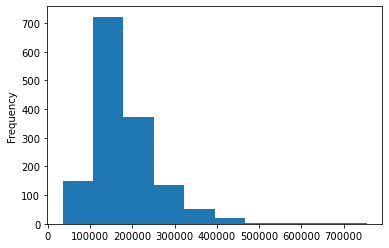

In [104]:
pd.Series(y).plot(kind='hist')

###  Hypothesis Test For Normality

In [107]:
#Normality test
val,pval=stats.shapiro(y)


"H0: Not Normal Distribution"
"H1: Normal Distribution"


'H1: Normal Distribution'

In [108]:
if pval < 0.05:
    print('Reject H0, Accept H1 Hence It is Normal Distribution')
else:
    print('Accept H0 Hence It is Not Normal Distribution')

Reject H0, Accept H1 Hence It is Normal Distribution


### OLS Base model

In [109]:
m1 = sm.OLS(train_y,train_X).fit()

In [110]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     575.7
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:34:33   Log-Likelihood:                -11380.
No. Observations:                1020   AIC:                         2.283e+04
Df Residuals:                     984   BIC:                         2.301e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass              -47.8082     63.138     -0.757      0.449    -171.709      76.092
LotArea                   0.7651      0.097      7.864      0.000       0.574       0.956
OverallQual            1.341e+04   4731.004      2.834      0.005    4123.073    2.27e+04
OverallCond            4335.1693    821.288      5.278      0.000    2723.492    5946.847
YearBuilt               283.7183     75.491      3.758      0.000     135.577     431.859
YearRemodAdd            175.4115     52.293      3.354      0.001      72.792     278.031
MasVnrArea                7.3693      5.281      1.395      0.163      -2.994      17.733
BsmtFinSF1              110.3993     37.917      2.912      0.004      35.992     184.807
BsmtFinSF2              103.8637     38.715      2.683      0.007      27.891     179.836
BsmtUnfSF               101.7259     37.969      2.679      0.008      27.216     176.236
LowQualFinSF             45.0711     38.091      1.183      0.237     -29.677     119.819
GrLivArea                36.2097     56.045      0.646      0.518     -73.772     146.192
BedroomAbvGr          -2043.5692   1328.592     -1.538      0.124   -4650.769     563.630
KitchenAbvGr          -1.037e+04   5157.400     -2.011      0.045   -2.05e+04    -248.896
TotRmsAbvGrd            392.7720    925.678      0.424      0.671   -1423.757    2209.301
Fireplaces             3423.6502   2363.759      1.448      0.148   -1214.937    8062.238
GarageYrBlt              26.0458     58.626      0.444      0.657     -89.000     141.092
GarageCars            -3907.1646   4281.176     -0.913      0.362   -1.23e+04    4494.121
GarageArea              306.8635    156.167      1.965      0.050       0.404     613.323
WoodDeckSF                8.8572      5.520      1.605      0.109      -1.975      19.690
OpenPorchSF              18.8289     10.933      1.722      0.085      -2.627      40.285
EnclosedPorch             9.2332     11.871      0.778      0.437     -14.063      32.529
3SsnPorch                64.4365     21.496      2.998      0.003      22.253     106.620
ScreenPorch              61.1971     12.153      5.036      0.000      37.349      85.045
PoolArea                -23.1530     18.304     -1.265      0.206     -59.073      12.767
MiscVal                   0.0379      1.128      0.034      0.973      -2.176       2.251
MoSold                 -511.4671    230.666     -2.217      0.027    -964.122     -58.812
YrSold                 -521.5434     88.264     -5.909      0.000    -694.750    -348.337
OverallQual_2         -3410.1514   1968.003     -1.733      0.083   -7272.118     451.815
OverallQual_3           318.0626    341.226      0.932      0.352    -351.553     987.678
OverallQual_4            -2.0059     18.103     -0.111      0.912     -37.531      33.520
GrLivArea_2            

In [111]:
p1=m1.predict(test_X)

### Calculations of  Errors

In [112]:
sse_1 = sum((test_y - p1)**2)
mse_1 = sse_1/len(test_y)
rmse_1 = np.sqrt(mse_1)
print(f'sse = {sse_1}, mse = {mse_1}, rmse = {rmse_1}')

sse = 345008237960.85944, mse = 787690041.0065284, rmse = 28065.816236242415


### OLS Model with Constant

In [114]:
train_X_C = sm.add_constant(train_X)
test_X_C = sm.add_constant(test_X)

In [115]:
m2 = sm.OLS(train_y,train_X_C).fit()

In [116]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     603.2
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:34:54   Log-Likelihood:                -11357.
No. Observations:                1020   AIC:                         2.279e+04
Df Residuals:                     984   BIC:                         2.296e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   990.6986   1214.248      0.816      0.415   -1392.115    3373.513
MSSubClass              -95.9291     75.222     -1.275      0.203    -243.544      51.685
LotArea                   0.7647      0.094      8.151      0.000       0.581       0.949
OverallQual            6298.8467   2773.645      2.271      0.023     855.907    1.17e+04
OverallCond            4294.1143    801.331      5.359      0.000    2721.599    5866.629
YearBuilt               306.6797     72.273      4.243      0.000     164.853     448.507
YearRemodAdd            159.0503     50.816      3.130      0.002      59.329     258.771
MasVnrArea                5.3215      5.171      1.029      0.304      -4.827      15.470
BsmtFinSF1               43.3815     42.538      1.020      0.308     -40.094     126.857
BsmtFinSF2               37.8994     42.887      0.884      0.377     -46.261     122.060
BsmtUnfSF                32.9188     42.585      0.773      0.440     -50.648     116.486
LowQualFinSF            117.8883     46.723      2.523      0.012      26.200     209.577
GrLivArea               -43.6373     60.930     -0.716      0.474    -163.205      75.930
BedroomAbvGr          -1576.1301   1301.388     -1.211      0.226   -4129.945     977.685
KitchenAbvGr          -1.206e+04   5332.022     -2.263      0.024   -2.25e+04   -1601.105
TotRmsAbvGrd            372.4025    912.378      0.408      0.683   -1418.028    2162.833
Fireplaces             2895.9160   2348.970      1.233      0.218   -1713.651    7505.483
GarageYrBlt              42.7139     57.298      0.745      0.456     -69.726     155.154
GarageCars            -1048.4195   4118.280     -0.255      0.799   -9130.040    7033.201
GarageArea              208.6067    145.042      1.438      0.151     -76.020     493.233
WoodDeckSF                9.0636      5.420      1.672      0.095      -1.572      19.699
OpenPorchSF              19.6978     10.729      1.836      0.067      -1.356      40.751
EnclosedPorch             5.7226     11.696      0.489      0.625     -17.230      28.675
3SsnPorch                66.3761     21.253      3.123      0.002      24.670     108.082
ScreenPorch              64.8944     11.902      5.452      0.000      41.538      88.251
PoolArea                -14.9399     17.778     -0.840      0.401     -49.828      19.948
MiscVal                   0.1049      1.104      0.095      0.924      -2.061       2.270
MoSold                 -472.8379    226.320     -2.089      0.037    -916.964     -28.712
YrSold                 -527.7339     85.485     -6.173      0.000    -695.489    -359.979
OverallQual_2         -2522.0696   1729.144     -1.459      0.145   -5915.304     871.164
OverallQual_3           279.4413    324.197      0.862      0.389    -356.756     915.639
OverallQual_4          

In [117]:
p2=m2.predict(test_X_C)

### Calculations of Errors

In [118]:
sse_2 = sum((test_y - p2)**2)
mse_2 = sse_2/len(test_y)
rmse_2 = np.sqrt(mse_2)
print(f'sse = {sse_2}, mse = {mse_2}, rmse = {rmse_2}')

sse = 344080292870.84485, mse = 785571444.9106047, rmse = 28028.04746875181


# Validate Assumptions of Linear Regression

## 1. No Multicolinarity

##  Find VIF for multicolinarity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant

In [120]:
const = add_constant(X)


In [121]:
const.shape[1]

267

In [122]:
d = pd.Series([VIF(const.values,i) for i in range(const.shape[1])],index=const.columns)


C:\Users\fenil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\fenil\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [123]:
vif = pd.DataFrame(d)
vif.rename(columns={0:'VIF'},inplace = True)


In [124]:
vif

VIF
const                     0.000000
MSSubClass               32.058147
LotArea                   2.768295
OverallQual            5191.253925
OverallCond               2.690753
...                            ...
SaleCondition_AdjLand     1.543287
SaleCondition_Alloca      1.703207
SaleCondition_Family      1.402049
SaleCondition_Normal      3.271650
SaleCondition_Partial    42.681750

[267 rows x 1 columns]

In [125]:
vif.reset_index(inplace=True)



In [126]:
vif.rename({'index':'feature'},axis=1,inplace=True)
vif.drop(0,axis=0,inplace=True)


In [127]:
vif

feature          VIF
1               MSSubClass    32.058147
2                  LotArea     2.768295
3              OverallQual  5191.253925
4              OverallCond     2.690753
5                YearBuilt    13.949697
..                     ...          ...
262  SaleCondition_AdjLand     1.543287
263   SaleCondition_Alloca     1.703207
264   SaleCondition_Family     1.402049
265   SaleCondition_Normal     3.271650
266  SaleCondition_Partial    42.681750

[266 rows x 2 columns]

# Remove VIF For No Multi-Colinarity in Regression

## Step 1. Remove VIF > 100 

####  keep less than vif = 100  features from the dataset 

In [128]:
to_keep_100 = list()
for i in range(1,vif.shape[0]):
    if vif.loc[i,'VIF'] < 100 :
        to_keep_100.append(vif.loc[i,'feature'])



In [129]:
train_100 = train_X_C[to_keep_100]
test_100 = test_X_C[to_keep_100]

In [130]:
train_100


MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
1001          20    11957            5       2006          2006        53.0   
1326          50    10440            7       1920          1950         0.0   
230           20     8760            6       1959          1959       220.0   
524           20     7500            5       2005          2005         0.0   
770           20     8877            5       1951          1951         0.0   
...          ...      ...          ...        ...           ...         ...   
1311          60    14774            5       1999          1999       165.0   
145          160     2522            5       2004          2006        50.0   
469           60     9291            5       1993          1993       120.0   
1301          20     8688            5       2005          2005       228.0   
153           20    13500            7       1960          1975         0.0   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
1001             3             1             7           1       2006.0   
1326             5             1             8           2       1920.0   
230              3             1             6           0       1959.0   
524              3             1             6           1       2005.0   
770              2             1             6           0       1951.0   
...            ...           ...           ...         ...          ...   
1311             4             1            10           1       1999.0   
145              3             1             7           0       2004.0   
469              3             1             7           0       1993.0   
1301             3             1             7           0       2005.0   
153              1             1             4           1       1960.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1001         144          104              0          0            0   
1326           0          547              0          0          480   
230            0            0            120          0            0   
524           38          144              0          0            0   
770            0            0              0          0            0   
...          ...          ...            ...        ...          ...   
1311         668           30              0          0            0   
145            0           40              0          0            0   
469          144           70              0          0            0   
1301         208           59              0          0            0   
153          409            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  Bath  MSZoning_FV  MSZoning_RH  \
1001         0        0       7    2008   2.0            0            0   
1326         0     1150       6    2008   2.0            0            0   
230          0        0       4    2010   2.0            0            0   
524          0        0       4    2006   2.0            1            0   
770          0        0       4    2006   1.0            0            0   
...        ...      ...     ...     ...   ...          ...          ...   
1311         0        0       5    2010   2.5            0            0   
145          0        0       4    2006   2.0            0            0   
469          0        0       6    2008   2.5            0            0   
1301         0        0       4    2006   2.0            0            0   
153          0        0       3    2008   2.0            0            0   

      MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
1001            1            0            1             0             0   
1326            0            1            1             0             0   
230             1            0            1             0             0   
524             0            0            1             0             0   
770            

## OLS Model & Prediction based on vif < 100

In [131]:
m3 = sm.OLS(train_y,train_100).fit()

In [132]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              264.8
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:35:50   Log-Likelihood:                         -11697.
No. Observations:                1020   AIC:                                  2.383e+04
Df Residuals:                     804   BIC:                                  2.489e+04
Df Model:                         216                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass             -136.6535    116.430     -1.174      0.241    -365.195      91.888
LotArea                   1.1481      0.142      8.075      0.000       0.869       1.427
OverallCond            5085.5578   1180.991      4.306      0.000    2767.367    7403.748
YearBuilt               327.5236    106.726      3.069      0.002     118.030     537.018
YearRemodAdd            120.3420     76.849      1.566      0.118     -30.507     271.191
MasVnrArea               37.2916      7.689      4.850      0.000      22.198      52.385
BedroomAbvGr           -947.5961   1936.244     -0.489      0.625   -4748.286    2853.094
KitchenAbvGr          -1.636e+04   7730.622     -2.116      0.035   -3.15e+04   -1185.331
TotRmsAbvGrd           9861.2863   1164.668      8.467      0.000    7575.138    1.21e+04
Fireplaces             9393.4113   3408.869      2.756      0.006    2702.077    1.61e+04
GarageYrBlt             124.5007     78.287      1.590      0.112     -29.171     278.173
WoodDeckSF               16.6539      8.240      2.021      0.044       0.479      32.828
OpenPorchSF              43.0136     16.468      2.612      0.009      10.689      75.339
EnclosedPorch             3.1567     17.600      0.179      0.858     -31.390      37.704
3SsnPorch                48.9833     32.233      1.520      0.129     -14.287     112.254
ScreenPorch              44.9183     18.412      2.440      0.015       8.777      81.060
PoolArea                155.1945     24.247      6.401      0.000     107.600     202.789
MiscVal                  -0.9851      1.690     -0.583      0.560      -4.303       2.333
MoSold                 -415.9208    346.036     -1.202      0.230   -1095.161     263.320
YrSold                 -543.7692    129.465     -4.200      0.000    -797.899    -289.639
Bath                   1.387e+04   2003.065      6.924      0.000    9938.349    1.78e+04
MSZoning_FV             3.04e+04   1.63e+04      1.864      0.063   -1605.919    6.24e+04
MSZoning_RH            3.093e+04   1.59e+04      1.947      0.052    -260.698    6.21e+04
MSZoning_RL            2.889e+04   1.35e+04      2.136      0.033    2339.998    5.54e+04
MSZoning_RM            2.882e+04   1.26e+04      2.293      0.022    4146.920    5.35e+04
Street_Pave            2.834e+04    1.7e+04      1.664      0.097   -5091.836    6.18e+04
LotShape_IR2           5946.0115   6547.542      0.908      0.364   -6906.282    1.88e+04
LotShape_IR3           3856.1052   1.06e+04      0.362      0.717    -1.7e+04    2.47e+04
LotShape_Reg           1873.0361   2253.024      0.831      0.406   -2549.467    6295.539
LandContour_HLS        4525.5114   7353.645      0.615      0.538   -9909.099     1.9e+04
LandContour_Lo

In [133]:
p3 = m3.predict(test_100)

## Calculations of Errors

In [134]:
sse_3 = sum((test_y - p3)** 2)
mse_3 = sse_3/len(test_y)
rmse_3 = np.sqrt(mse_3)
print(f'sse = {sse_3}, mse = {mse_3}, rmse = {rmse_3}')

sse = 516305482426.8239, mse = 1178779640.2438903, rmse = 34333.36045661552


## Step 2. Remove VIF > 10

In [135]:
const1 = add_constant(X[to_keep_100])
# const1.drop('const',axis=1,inplace=True)
# const1.shape[1]
d1 = pd.Series([VIF(const1.values,i) for i in range(const1.shape[1])],index=const1.columns)


C:\Users\fenil\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [136]:
vif_10 = pd.DataFrame(d1)
vif_10.rename(columns={0:'VIF'},inplace = True)


In [137]:
vif_10.reset_index(inplace=True)
vif_10.rename({'index':'feature'},axis=1,inplace=True)
vif_10.drop(0,axis=0,inplace=True)



In [138]:
vif_10

feature        VIF
1               MSSubClass  34.142153
2                  LotArea   3.110991
3              OverallCond   2.555782
4                YearBuilt  14.346800
5             YearRemodAdd   3.585409
..                     ...        ...
220            SaleType_WD   5.550327
221  SaleCondition_AdjLand   1.595531
222   SaleCondition_Alloca   1.664253
223   SaleCondition_Family   1.393213
224   SaleCondition_Normal   3.353757

[224 rows x 2 columns]


### keep vif < 10 features in list

In [139]:
to_keep_10 = []

for i in range(1,vif_10.shape[0]):
    if vif_10.loc[i,'VIF'] < 10 :
        to_keep_10.append(vif_10.loc[i,'feature'])



In [140]:
len(to_keep_10)

164

In [141]:
train_10 = train_X_C[to_keep_10]
test_10 = test_X_C[to_keep_10]

##  OLS Model & Prediction based on vif < 10

In [142]:
m4 = sm.OLS(train_y,train_10).fit()

In [143]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              269.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:36:20   Log-Likelihood:                         -11884.
No. Observations:                1020   AIC:                                  2.408e+04
Df Residuals:                     863   BIC:                                  2.485e+04
Df Model:                         157                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   1.1316      0.152      7.434      0.000       0.833       1.430
OverallCond            5084.2717   1226.535      4.145      0.000    2676.932    7491.612
YearRemodAdd            315.3138     83.329      3.784      0.000     151.762     478.865
MasVnrArea               39.4540      6.933      5.691      0.000      25.846      53.062
BedroomAbvGr          -3679.3564   2073.369     -1.775      0.076   -7748.793     390.080
KitchenAbvGr          -3.151e+04   8273.514     -3.809      0.000   -4.77e+04   -1.53e+04
TotRmsAbvGrd           1.406e+04   1220.681     11.516      0.000    1.17e+04    1.65e+04
Fireplaces             1.212e+04   2023.779      5.989      0.000    8148.515    1.61e+04
GarageYrBlt             307.0144     76.534      4.011      0.000     156.800     457.229
WoodDeckSF                9.9053      9.151      1.082      0.279      -8.055      27.866
OpenPorchSF              68.1786     17.903      3.808      0.000      33.040     103.318
EnclosedPorch            -8.1845     18.908     -0.433      0.665     -45.295      28.926
3SsnPorch                47.1861     36.108      1.307      0.192     -23.684     118.056
ScreenPorch              58.4014     19.962      2.926      0.004      19.222      97.581
PoolArea                149.9337     27.496      5.453      0.000      95.968     203.900
MiscVal                  -1.0188      1.916     -0.532      0.595      -4.779       2.742
MoSold                 -460.4291    384.492     -1.198      0.231   -1215.077     294.219
YrSold                 -645.3034     99.059     -6.514      0.000    -839.729    -450.878
Bath                   1.728e+04   2160.258      8.000      0.000     1.3e+04    2.15e+04
MSZoning_RH           -1013.2506   9984.205     -0.101      0.919   -2.06e+04    1.86e+04
Street_Pave            4.195e+04   1.85e+04      2.269      0.024    5654.849    7.82e+04
LotShape_IR2           1.071e+04   7213.688      1.484      0.138   -3450.801    2.49e+04
LotShape_IR3           4971.1622   1.19e+04      0.418      0.676   -1.84e+04    2.83e+04
LotShape_Reg           1760.8406   2492.684      0.706      0.480   -3131.592    6653.273
LandContour_HLS        5806.1665   8087.947      0.718      0.473   -1.01e+04    2.17e+04
LandContour_Low       -1.175e+04   9669.689     -1.216      0.224   -3.07e+04    7225.101
LandContour_Lvl       -2633.6211   5928.272     -0.444      0.657   -1.43e+04    9001.898
Utilities_NoSeWa       9.936e-09   1.64e-08      0.606      0.545   -2.23e-08    4.21e-08
LotConfig_CulDSac      1.352e+04   5317.517      2.543      0.011    3083.092     2.4e+04
LotConfig_FR2         -1.154e+04   6131.946     -1.881      0.060   -2.36e+04     498.129
LotConfig_FR3 

In [144]:
p4 = m4.predict(test_10)

## Calculations of Errors

In [145]:
sse_4 = sum((test_y - p4)** 2)
mse_4 = sse_4/len(test_y)
rmse_4 = np.sqrt(mse_4)
print(f'sse = {sse_4}, mse = {mse_4}, rmse = {rmse_4}')

sse = 624604891499.6, mse = 1426038565.0675797, rmse = 37762.92580120851


## Step 3. Remove VIF < 5

In [146]:
const2 = add_constant(X[to_keep_10])
# const1.drop('const',axis=1,inplace=True)
const1.shape[1]
d2 = pd.Series([VIF(const2.values,i) for i in range(const2.shape[1])],index=const2.columns)


In [147]:
vif_5 = pd.DataFrame(d2)
vif_5.rename(columns={0:'VIF'},inplace = True)


In [148]:
vif_5.reset_index(inplace=True)
vif_5.rename({'index':'feature'},axis=1,inplace=True)
vif_5.drop(0,axis=0,inplace=True)



In [149]:
vif_5

feature       VIF
1                  LotArea  2.766842
2              OverallCond  2.023856
3             YearRemodAdd  3.180078
4               MasVnrArea  1.661622
5             BedroomAbvGr  2.856841
..                     ...       ...
160           SaleType_Oth  1.136178
161            SaleType_WD  4.864222
162  SaleCondition_AdjLand  1.389193
163   SaleCondition_Alloca  1.402620
164   SaleCondition_Family  1.117560

[164 rows x 2 columns]

### keep vif < 5 features 

In [150]:
to_keep_5 = []
for i in range(1,vif_5.shape[0]):
    if vif_5.loc[i,'VIF'] < 5 :
        to_keep_5.append(vif_5.loc[i,'feature'])



In [151]:
train_5 = train_X_C[to_keep_5]
test_5 = test_X_C[to_keep_5]

In [152]:
print(train_5.shape)
print(test_5.shape)

(1020, 160)
(438, 160)


## OLS Model & Prediction based on vif < 5

In [153]:
m5 = sm.OLS(train_y,train_5).fit()

In [154]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              273.2
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:36:28   Log-Likelihood:                         -11892.
No. Observations:                1020   AIC:                                  2.409e+04
Df Residuals:                     867   BIC:                                  2.484e+04
Df Model:                         153                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   1.0994      0.151      7.257      0.000       0.802       1.397
OverallCond            4347.2145   1191.536      3.648      0.000    2008.582    6685.847
YearRemodAdd            323.8971     83.125      3.897      0.000     160.747     487.047
MasVnrArea               40.3737      6.969      5.793      0.000      26.696      54.052
BedroomAbvGr          -3789.9949   2082.018     -1.820      0.069   -7876.380     296.390
KitchenAbvGr          -3.124e+04   8314.975     -3.757      0.000   -4.76e+04   -1.49e+04
TotRmsAbvGrd           1.414e+04   1218.176     11.604      0.000    1.17e+04    1.65e+04
Fireplaces             1.166e+04   2021.397      5.769      0.000    7693.187    1.56e+04
GarageYrBlt             357.9724     75.218      4.759      0.000     210.342     505.603
WoodDeckSF               10.0264      9.183      1.092      0.275      -7.998      28.050
OpenPorchSF              76.0573     17.877      4.255      0.000      40.971     111.144
EnclosedPorch            -9.6471     18.679     -0.516      0.606     -46.309      27.015
3SsnPorch                48.2028     36.321      1.327      0.185     -23.084     119.490
ScreenPorch              59.6214     20.053      2.973      0.003      20.264      98.979
PoolArea                156.0568     27.601      5.654      0.000     101.885     210.228
MiscVal                  -1.0602      1.927     -0.550      0.582      -4.843       2.723
MoSold                 -372.7703    385.246     -0.968      0.334   -1128.894     383.353
YrSold                 -693.2928     96.809     -7.161      0.000    -883.301    -503.285
Bath                   1.713e+04   2170.411      7.892      0.000    1.29e+04    2.14e+04
MSZoning_RH             463.7405      1e+04      0.046      0.963   -1.92e+04    2.01e+04
Street_Pave            4.283e+04   1.86e+04      2.304      0.021    6343.843    7.93e+04
LotShape_IR2           1.095e+04   7239.435      1.513      0.131   -3255.296    2.52e+04
LotShape_IR3           4263.5160   1.19e+04      0.358      0.720   -1.91e+04    2.76e+04
LotShape_Reg           1528.8071   2504.349      0.610      0.542   -3386.489    6444.104
LandContour_HLS        6596.6006   8121.757      0.812      0.417   -9344.004    2.25e+04
LandContour_Low         -1.3e+04   9714.584     -1.338      0.181   -3.21e+04    6064.846
LandContour_Lvl       -3030.2697   5951.285     -0.509      0.611   -1.47e+04    8650.341
Utilities_NoSeWa      -1.916e-09    9.7e-09     -0.197      0.843    -2.1e-08    1.71e-08
LotConfig_CulDSac      1.361e+04   5335.494      2.551      0.011    3138.043    2.41e+04
LotConfig_FR2         -1.032e+04   6148.420     -1.678      0.094   -2.24e+04    1751.738
LotConfig_FR3 

In [155]:
p5 = m5.predict(test_5)

In [156]:
sse_5 = sum((test_y - p5)** 2)
mse_5 = sse_5/len(test_y)
rmse_5 = np.sqrt(mse_5)
print(f'sse = {sse_5}, mse = {mse_5}, rmse = {rmse_5}')

sse = 647901738910.5312, mse = 1479227714.4076056, rmse = 38460.729509560864


## Pearson Correlation Using Heatmap

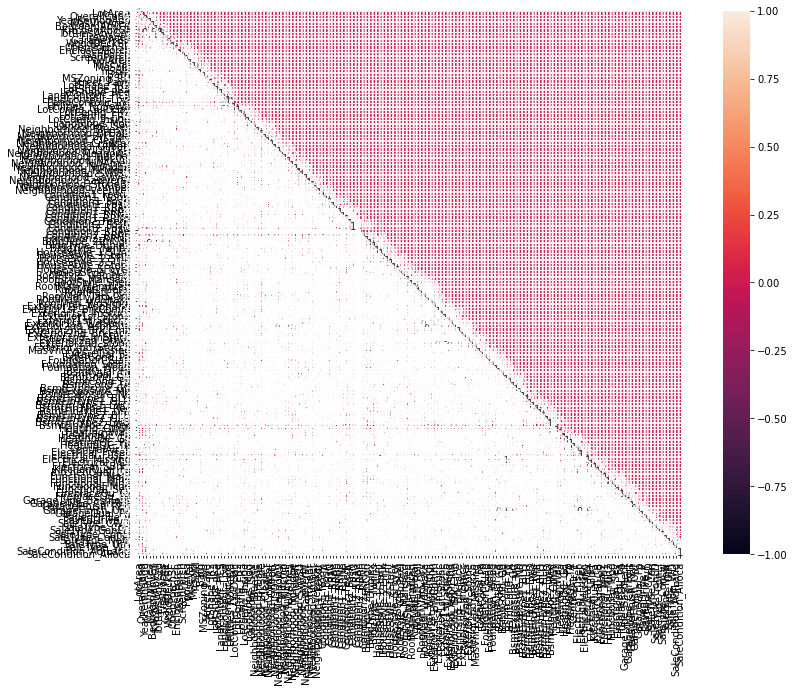

In [157]:
cor = train_5.corr()
cor = np.tril(cor,k=1)
plt.figure(figsize=(15,10))
cols=train_5.columns
sns.heatmap(cor,annot=True,xticklabels=cols,yticklabels=cols,vmin=-1,vmax=1,square=True)
plt.show()



### Write function which identify which features multicolinarity here cut-off is >=0.6

In [158]:
features = set()
def multi_feature(dataframe,threshold):
    matrix = dataframe.corr()
    for i in range(len(dataframe.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j]) > threshold:
                features.add(dataframe.columns[i])
                print(dataframe.columns[i],matrix.iloc[i,j])
                
   
                
                
            
        
            
    

In [159]:
multi_feature(train_5,0.65)

TotRmsAbvGrd 0.6832480905400418
BldgType_Duplex 0.6816098520708324
HouseStyle_2Story -0.6625354323438727
Exterior2nd_AsphShn 0.7067597348926671
Exterior2nd_Brk Cmn 0.7064118357791507
Exterior2nd_Brk Cmn 0.7064118357791551
Exterior2nd_Stucco 0.760717846460621
Electrical_Mix 1.0
SaleType_WD -0.7504945583007875


In [160]:
l1=list(features)



## 2. No Heteroscadascticity (Second Assumptions of Linear Regression)

In [161]:
import statsmodels.stats.api as sts


## BreuschPagan Test 
### This Hypothesis test used to identify is there  any heteroscadascticity in Linear Regression

In [162]:
het=sts.het_breuschpagan(m5.resid,m5.model.exog)

In [163]:
if het[1] < 0.05:
    print("reject null hypothesis Hence it is heteroscadasticity")
else:
    print('fail to reject region Hence it is homoscadascticity')


reject null hypothesis Hence it is heteroscadasticity


## Plot the Graph to visulize the homoscadasticity in the regression

In [164]:
resid = test_y - p5


<AxesSubplot:ylabel='SalePrice'>

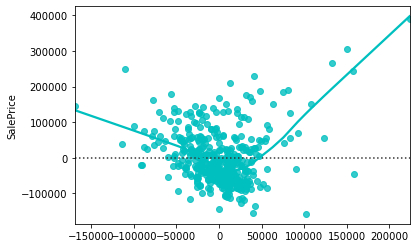

In [165]:
sns.residplot(resid,test_y,color='c',lowess=True)

## 3. Residuals Has Normal Distribution

### this is third assumptions of Linear Regression.

((array([-2.95147978e+00, -2.66598764e+00, -2.50518721e+00, -2.39103246e+00,
       -2.30149840e+00, -2.22732017e+00, -2.16368814e+00, -2.10777219e+00,
       -2.05776073e+00, -2.01242158e+00, -1.97087720e+00, -1.93247965e+00,
       -1.89673638e+00, -1.86326389e+00, -1.83175751e+00, -1.80197103e+00,
       -1.77370250e+00, -1.74678419e+00, -1.72107515e+00, -1.69645579e+00,
       -1.67282372e+00, -1.65009057e+00, -1.62817955e+00, -1.60702343e+00,
       -1.58656307e+00, -1.56674613e+00, -1.54752603e+00, -1.52886118e+00,
       -1.51071426e+00, -1.49305161e+00, -1.47584285e+00, -1.45906037e+00,
       -1.44267906e+00, -1.42667599e+00, -1.41103017e+00, -1.39572234e+00,
       -1.38073475e+00, -1.36605105e+00, -1.35165612e+00, -1.33753595e+00,
       -1.32367753e+00, -1.31006877e+00, -1.29669840e+00, -1.28355590e+00,
       -1.27063144e+00, -1.25791581e+00, -1.24540038e+00, -1.23307704e+00,
       -1.22093817e+00, -1.20897659e+00, -1.19718554e+00, -1.18555862e+00,
       -1.17408979e+00,

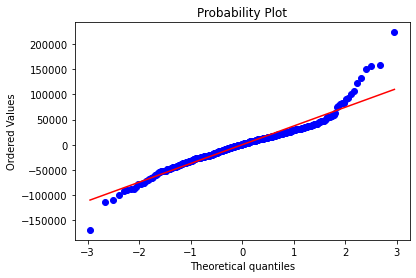

In [166]:
print(stats.probplot(resid,dist='norm',plot=pylab))

# Feature Selection

###  Feature Selection is used to reduce the dimension of dataset as well reduce the Errors in the regression which give back optimum predictions from the model

### 1. Feature Selection using Chi2 Hypothesis test

In [167]:
fs=SelectKBest(chi2,k=25)


In [168]:
train_5 = train_5.astype('int64')
train_y = train_y.astype('int64')

In [169]:
rank=fs.fit(train_5,train_y)

In [170]:
df_fs=pd.DataFrame({'features':train_5.columns,'rank':rank.scores_})

In [171]:
df_fs.sort_values(by='rank',ascending=False)[:20]

features          rank
0                 LotArea  9.238704e+06
15                MiscVal  5.894671e+06
3              MasVnrArea  2.178258e+05
14               PoolArea  1.883790e+05
13            ScreenPorch  1.151930e+05
12              3SsnPorch  1.101838e+05
9              WoodDeckSF  9.760160e+04
11          EnclosedPorch  7.629951e+04
10            OpenPorchSF  5.473467e+04
63        Condition2_PosN  1.019000e+03
96      Exterior2nd_Other  1.019000e+03
88    Exterior1st_ImStucc  1.019000e+03
151          SaleType_Con  1.019000e+03
126          HeatingQC_Po  1.019000e+03
101          ExterCond_Po  1.019000e+03
159  SaleCondition_Alloca  9.158571e+02
99     MasVnrType_Missing  9.130000e+02
45   Neighborhood_NoRidge  8.182000e+02
155          SaleType_New  7.915618e+02
52   Neighborhood_Veenker  7.909592e+02

### 2. Feature Selection using Anova Hypothesis Test

In [172]:
fs2=SelectKBest(mutual_info_regression,k=25)


In [173]:
rank2=fs2.fit(train_5,train_y)

In [174]:
df_fs2=pd.DataFrame({'features':train_5.columns,'rank':rank2.scores_})

In [175]:
df_fs2.sort_values(by='rank',ascending=False)[:20]

features      rank
18                   Bath  0.244448
2            YearRemodAdd  0.237770
135        KitchenQual_Gd  0.191454
6            TotRmsAbvGrd  0.190941
106           BsmtQual_Gd  0.173629
7              Fireplaces  0.171222
8             GarageYrBlt  0.148873
1             OverallCond  0.141385
146      GarageFinish_Unf  0.115234
114      BsmtFinType1_GLQ  0.105590
145      GarageFinish_RFn  0.093316
4            BedroomAbvGr  0.091674
3              MasVnrArea  0.089500
127          HeatingQC_TA  0.086090
155          SaleType_New  0.074827
46   Neighborhood_NridgHt  0.065986
128          CentralAir_Y  0.064462
74      HouseStyle_2Story  0.063106
23           LotShape_Reg  0.062296
10            OpenPorchSF  0.060821

In [176]:
chi2_fs=df_fs.sort_values(by='rank',ascending=False)[:20]['features'].to_list()


In [177]:
anova_fs=df_fs2.sort_values(by='rank',ascending=False)[:20]['features'].to_list()

###  Writes function To check How many features are common selected from anova test and chi2 test

In [178]:
count = 0
for i in chi2_fs:
    if i in anova_fs:
        print(i)
        count +=1
print(count)

MasVnrArea
OpenPorchSF
SaleType_New
3


## Train OLS Model on Selected Features

## 1. chi2 selected features (20) Model Building and Prediction

In [179]:
m6 = sm.OLS(train_y,train_5.loc[:,chi2_fs]).fit()

In [180]:
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              219.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:40:00   Log-Likelihood:                         -13020.
No. Observations:                1020   AIC:                                  2.608e+04
Df Residuals:                    1000   BIC:                                  2.618e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
LotArea                  3.7536      0.219     17.165      0.000       3.324       4.183
MiscVal                  5.1152      5.122      0.999      0.318      -4.936      15.167
MasVnrArea             203.6821     16.058     12.684      0.000     172.171     235.194
PoolArea               180.3889     68.946      2.616      0.009      45.093     315.685
ScreenPorch            308.0236     50.389      6.113      0.000     209.143     406.904
3SsnPorch              308.0976     93.067      3.310      0.001     125.468     490.727
WoodDeckSF             310.6005     20.976     14.808      0.000     269.439     351.762
EnclosedPorch          328.0320     42.456      7.726      0.000     244.718     411.346
OpenPorchSF            634.6624     39.227     16.179      0.000     557.686     711.638
Condition2_PosN      -3.411e+04   8.66e+04     -0.394      0.694   -2.04e+05    1.36e+05
Exterior2nd_Other    -2.276e+04   8.62e+04     -0.264      0.792   -1.92e+05    1.46e+05
Exterior1st_ImStucc   2817.6775    8.8e+04      0.032      0.974    -1.7e+05    1.75e+05
SaleType_Con          1.017e+05   8.55e+04      1.189      0.235   -6.62e+04     2.7e+05
HeatingQC_Po         -1.181e+04   8.61e+04     -0.137      0.891   -1.81e+05    1.57e+05
ExterCond_Po         -2.757e+04   8.57e+04     -0.322      0.748   -1.96e+05    1.41e+05
SaleCondition_Alloca  9.325e+04   3.29e+04      2.835      0.005    2.87e+04    1.58e+05
MasVnrType_Missing    5667.3554   3.95e+04      0.144      0.886   -7.18e+04    8.31e+04
Neighborhood_NoRidge  7.707e+04   1.89e+04      4.088      0.000    4.01e+04    1.14e+05
SaleType_New          1.104e+05   9903.187     11.146      0.000     9.1e+04     1.3e+05
Neighborhood_Veenker  9.424e+04   3.27e+04      2.883      0.004    3.01e+04    1.58e+05
==============================================================================
Omnibus:                      396.516   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3929.689
Skew:                          -1.497   Prob(JB):                         0.00
Kurtosis:                      12.138   Cond. No.                     5.11e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
p6 = m6.predict(test_5.loc[:,chi2_fs])

In [182]:
sse_6 = sum((test_y - p6)** 2)
mse_6 = sse_6/len(test_y)
rmse_6 = np.sqrt(mse_6)
print(f'sse = {sse_6}, mse = {mse_6}, rmse = {rmse_6}')

sse = 3196854474600.473, mse = 7298754508.220259, rmse = 85432.74845292207


## 2. Anova selected Features (20) Model Building and Prediction

In [183]:
m7 = sm.OLS(train_y,train_5.loc[:,anova_fs]).fit()

In [184]:
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1088.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:40:00   Log-Likelihood:                         -12285.
No. Observations:                1020   AIC:                                  2.461e+04
Df Residuals:                    1000   BIC:                                  2.471e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bath                  1.812e+04   2362.548      7.670      0.000    1.35e+04    2.28e+04
YearRemodAdd           -19.9790     74.923     -0.267      0.790    -167.003     127.045
KitchenQual_Gd        7112.5597   3335.898      2.132      0.033     566.397    1.37e+04
TotRmsAbvGrd           1.81e+04   1365.324     13.260      0.000    1.54e+04    2.08e+04
BsmtQual_Gd           1707.7871   3301.476      0.517      0.605   -4770.828    8186.402
Fireplaces             2.14e+04   2251.272      9.505      0.000     1.7e+04    2.58e+04
GarageYrBlt             10.1882     73.345      0.139      0.890    -133.740     154.116
OverallCond           5056.6487   1352.431      3.739      0.000    2402.720    7710.577
GarageFinish_Unf     -8587.4547   3632.893     -2.364      0.018   -1.57e+04   -1458.486
BsmtFinType1_GLQ      2.494e+04   3735.341      6.677      0.000    1.76e+04    3.23e+04
GarageFinish_RFn     -3715.9458   3548.974     -1.047      0.295   -1.07e+04    3248.345
BedroomAbvGr         -1.134e+04   2409.122     -4.708      0.000   -1.61e+04   -6614.826
MasVnrArea              72.7256      8.121      8.956      0.000      56.790      88.661
HeatingQC_TA         -1.128e+04   3216.068     -3.508      0.000   -1.76e+04   -4970.485
SaleType_New          4.369e+04   5120.351      8.533      0.000    3.36e+04    5.37e+04
Neighborhood_NridgHt  4.399e+04   6816.064      6.455      0.000    3.06e+04    5.74e+04
CentralAir_Y          2.747e+04   5619.343      4.888      0.000    1.64e+04    3.85e+04
HouseStyle_2Story    -2143.2164   3307.537     -0.648      0.517   -8633.726    4347.293
LotShape_Reg         -1.388e+04   2859.558     -4.854      0.000   -1.95e+04   -8267.652
OpenPorchSF            105.2082     21.224      4.957      0.000      63.559     146.858
==============================================================================
Omnibus:                      468.084   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7892.183
Skew:                           1.668   Prob(JB):                         0.00
Kurtosis:                      16.213   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
p7 = m7.predict(test_5.loc[:,anova_fs])

### Error Calculations

In [186]:
sse_7 = sum((test_y - p7)** 2)
mse_7 = sse_7/len(test_y)
rmse_7 = np.sqrt(mse_7)
print(f'sse = {sse_7}, mse = {mse_7}, rmse = {rmse_7}')

sse = 869598194915.7861, mse = 1985384006.657046, rmse = 44557.64812753301


### Anova Model after remove p < 0.05 from Summary of the anova model

In [187]:
anova_f = [i for i in anova_fs if i not in ['CentralAir_Y','HouseStyle_2Story']]

In [188]:
m10 = sm.OLS(train_y,train_5.loc[:,anova_f]).fit()

In [189]:
m10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              1181.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:40:01   Log-Likelihood:                         -12298.
No. Observations:                1020   AIC:                                  2.463e+04
Df Residuals:                    1002   BIC:                                  2.472e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bath                  1.848e+04   2383.915      7.751      0.000    1.38e+04    2.32e+04
YearRemodAdd           -38.9589     75.653     -0.515      0.607    -187.415     109.497
KitchenQual_Gd        7933.2069   3363.522      2.359      0.019    1332.851    1.45e+04
TotRmsAbvGrd          1.716e+04   1323.483     12.967      0.000    1.46e+04    1.98e+04
BsmtQual_Gd           2399.9330   3268.848      0.734      0.463   -4014.640    8814.506
Fireplaces            2.335e+04   2240.579     10.423      0.000     1.9e+04    2.78e+04
GarageYrBlt             39.8537     73.899      0.539      0.590    -105.162     184.869
OverallCond           5958.5600   1354.825      4.398      0.000    3299.940    8617.180
GarageFinish_Unf     -8219.6659   3668.107     -2.241      0.025   -1.54e+04   -1021.614
BsmtFinType1_GLQ      2.581e+04   3772.709      6.841      0.000    1.84e+04    3.32e+04
GarageFinish_RFn     -2278.6230   3576.421     -0.637      0.524   -9296.758    4739.512
BedroomAbvGr         -1.048e+04   2422.978     -4.326      0.000   -1.52e+04   -5726.465
MasVnrArea              74.9073      8.166      9.173      0.000      58.883      90.931
HeatingQC_TA         -1.205e+04   3245.692     -3.712      0.000   -1.84e+04   -5680.333
SaleType_New          4.513e+04   5164.170      8.738      0.000     3.5e+04    5.53e+04
Neighborhood_NridgHt   4.43e+04   6891.509      6.429      0.000    3.08e+04    5.78e+04
LotShape_Reg         -1.458e+04   2887.803     -5.050      0.000   -2.03e+04   -8917.207
OpenPorchSF             97.5995     21.326      4.577      0.000      55.751     139.448
==============================================================================
Omnibus:                      449.108   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7163.237
Skew:                           1.594   Prob(JB):                         0.00
Kurtosis:                      15.585   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
p10 = m10.predict(test_5.loc[:,anova_f])

###  Error Calculations

In [191]:
sse_10 = sum((test_y - p10)** 2)
mse_10 = sse_10/len(test_y)
rmse_10 = np.sqrt(mse_10)
print(f'sse = {sse_10}, mse = {mse_10}, rmse = {rmse_10}')

sse = 866758746271.775, mse = 1978901247.1958334, rmse = 44484.84289278578


In [192]:
len(anova_f)

18


## 3. Further reduce features from chi2 regression selected features (10)

###  Model Building and Predictions 

In [193]:
chi2_fs_10=df_fs.sort_values(by='rank',ascending=False)[:10]['features'].to_list()

In [194]:
m8 = sm.OLS(train_y,train_5.loc[:,chi2_fs_10]).fit()

In [195]:
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              370.5
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:40:01   Log-Likelihood:                         -13093.
No. Observations:                1020   AIC:                                  2.621e+04
Df Residuals:                    1010   BIC:                                  2.626e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LotArea             3.8765      0.233     16.662      0.000       3.420       4.333
MiscVal             4.0481      5.472      0.740      0.460      -6.690      14.786
MasVnrArea        247.3800     16.064     15.399      0.000     215.857     278.903
PoolArea          195.2783     73.371      2.662      0.008      51.302     339.255
ScreenPorch       298.7691     53.209      5.615      0.000     194.357     403.181
3SsnPorch         341.3134     99.343      3.436      0.001     146.372     536.255
WoodDeckSF        324.8441     22.262     14.592      0.000     281.159     368.529
EnclosedPorch     311.4863     44.828      6.948      0.000     223.519     399.453
OpenPorchSF       719.5737     40.911     17.589      0.000     639.294     799.854
Condition2_PosN   3.23e+04   9.21e+04      0.351      0.726   -1.49e+05    2.13e+05
==============================================================================
Omnibus:                      413.397   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4361.633
Skew:                          -1.557   Prob(JB):                         0.00
Kurtosis:                      12.640   Cond. No.                     4.99e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
p8 = m8.predict(test_5.loc[:,chi2_fs_10])

###  Error Calculations

In [197]:
sse_8 = sum((test_y - p8)** 2)
mse_8 = sse_8/len(test_y)
rmse_8 = np.sqrt(mse_8)
print(f'sse = {sse_8}, mse = {mse_8}, rmse = {rmse_8}')

sse = 3420954524893.961, mse = 7810398458.662011, rmse = 88376.45873569505


## 4. Further reduce features from anova regression Anova selected features (10) 

In [198]:
anova_fs_10 =df_fs2.sort_values(by='rank',ascending=False)[:10]['features'].to_list()

### Model Building and Predictions

In [199]:
m9 = sm.OLS(train_y,train_5.loc[:,anova_fs_10]).fit()

In [200]:
m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              1487.
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:40:01   Log-Likelihood:                         -12474.
No. Observations:                1020   AIC:                                  2.497e+04
Df Residuals:                    1010   BIC:                                  2.502e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Bath              2.027e+04   2797.269      7.246      0.000    1.48e+04    2.58e+04
YearRemodAdd      -115.9512     88.867     -1.305      0.192    -290.337      58.434
KitchenQual_Gd    1.539e+04   3768.070      4.084      0.000    7993.717    2.28e+04
TotRmsAbvGrd      1.743e+04   1119.501     15.569      0.000    1.52e+04    1.96e+04
BsmtQual_Gd      -3547.3379   3802.424     -0.933      0.351    -1.1e+04    3914.217
Fireplaces        2.984e+04   2581.553     11.560      0.000    2.48e+04    3.49e+04
GarageYrBlt        108.0733     86.826      1.245      0.214     -62.308     278.454
OverallCond       3330.1751   1586.582      2.099      0.036     216.801    6443.549
GarageFinish_Unf -2.376e+04   3666.873     -6.481      0.000    -3.1e+04   -1.66e+04
BsmtFinType1_GLQ  3.907e+04   4311.761      9.062      0.000    3.06e+04    4.75e+04
==============================================================================
Omnibus:                      378.054   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2555.221
Skew:                           1.538   Prob(JB):                         0.00
Kurtosis:                      10.118   Cond. No.                     8.29e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
p9 = m9.predict(test_5.loc[:,anova_fs_10])

###  Error Calculations

In [202]:
sse_9 = sum((test_y - p9)** 2)
mse_9 = sse_9/len(test_y)
rmse_9 = np.sqrt(mse_9)
print(f'sse = {sse_9}, mse = {mse_9}, rmse = {rmse_9}')

sse = 1244152446400.4824, mse = 2840530699.5444803, rmse = 53296.62934505784


## Final Report of All OLS Model 

In [203]:
report=pd.DataFrame({'R-Squared':[m1.rsquared,m2.rsquared,m3.rsquared
                                  ,m4.rsquared,m5.rsquared,m6.rsquared,
                                  m7.rsquared,m8.rsquared,m9.rsquared,m10.rsquared],
                     'Adj-R-Squared':[m1.rsquared_adj,m2.rsquared_adj,
                                      m3.rsquared_adj,m4.rsquared_adj,
                                      m5.rsquared_adj,m6.rsquared_adj,
                                      m7.rsquared_adj,m8.rsquared_adj,m9.rsquared_adj,m10.rsquared_adj],
                     'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6,rmse_7,rmse_8,rmse_9,rmse_10],
                     'SSE':[sse_1,sse_2,sse_3,sse_4,sse_5,sse_6,sse_7,sse_8,sse_9,sse_10]})

In [204]:
s = pd.Series(['OLS Base Model','OLS Model With Constant','OLS Model After Removing VIF 100',
               'OLS Model After Removing VIF 10','OLS Model After Removing VIF 5',
              'OLS Model Feature Selection Chi2(20)','OLS Model Feature Selection anova(20)',
              'OLS Model Feature Selection Chi2(10)','OLS Model Feature Selection Anova(10)',
              '(18 anova_f)OLS Model Feature Selection Base on p val Anova'])

In [205]:
report=report.set_index([s])

In [206]:
report=report.reset_index()

In [207]:
report['Model'] = report['index']

In [208]:
report.drop('index',axis=1,inplace=True)

In [209]:
report[['Model','R-Squared', 'Adj-R-Squared', 'RMSE', 'SSE']]

Model  R-Squared  \
0                                     OLS Base Model   0.953440   
1                            OLS Model With Constant   0.955468   
2                   OLS Model After Removing VIF 100   0.986139   
3                    OLS Model After Removing VIF 10   0.980019   
4                     OLS Model After Removing VIF 5   0.979678   
5               OLS Model Feature Selection Chi2(20)   0.814367   
6              OLS Model Feature Selection anova(20)   0.956065   
7               OLS Model Feature Selection Chi2(10)   0.785775   
8              OLS Model Feature Selection Anova(10)   0.936402   
9  (18 anova_f)OLS Model Feature Selection Base o...   0.954992   

   Adj-R-Squared          RMSE           SSE  
0       0.951784  28065.816236  3.450082e+11  
1       0.953884  28028.047469  3.440803e+11  
2       0.982415  34333.360457  5.163055e+11  
3       0.976384  37762.925801  6.246049e+11  
4       0.976092  38460.729510  6.479017e+11  
5       0.810654  85432.748453  3.196854e+12  
6       0.955187  44557.648128  8.695982e+11  
7       0.783654  88376.458736  3.420955e+12  
8       0.935773  53296.629345  1.244152e+12  
9       0.954183  44484.842893  8.667587e+11

##  Based on Final Report Selection Model and Predictions

In [210]:
p_y = m7.predict(test_5[anova_fs])

In [211]:
gdf = pd.DataFrame({'actual':test_y,'prediction':p_y})

<AxesSubplot:>

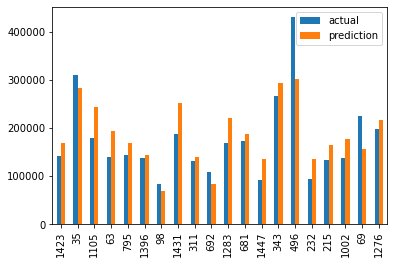

In [212]:
gdf[20:40].plot(kind='bar')

In [213]:
gdf

actual     prediction
1347  122000.0  131127.743185
1392  246578.0  263765.865354
1209  189000.0  210782.447140
218   311500.0  276238.762685
683   221000.0  170122.460096
...        ...            ...
473   440000.0  357660.673395
626   153000.0  204403.158124
254   145000.0  102508.039042
1023  287000.0  277698.260354
1045  556581.0  364683.190685

[438 rows x 2 columns]

In [214]:
gdf.describe()

actual     prediction
count     438.000000     438.000000
mean   182946.776256  185882.307989
std     81712.967405   70025.764128
min     39300.000000   25493.133202
25%    132062.500000  131147.088874
50%    164950.000000  180086.864822
75%    213500.000000  230063.362680
max    755000.000000  490696.493222

## Assumptions of Final Model
## 1.Check Homoscadasticity of Final Model 

In [215]:
resid1 = gdf['actual'] - gdf['prediction']

<AxesSubplot:ylabel='SalePrice'>

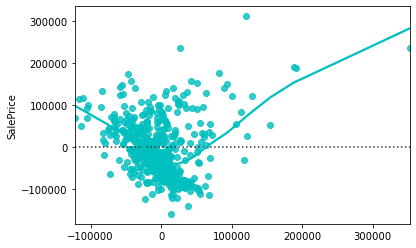

In [216]:
sns.residplot(resid1,test_y,color='c',lowess=True)

## 2. Residuals Distributions

((array([-2.95147978e+00, -2.66598764e+00, -2.50518721e+00, -2.39103246e+00,
         -2.30149840e+00, -2.22732017e+00, -2.16368814e+00, -2.10777219e+00,
         -2.05776073e+00, -2.01242158e+00, -1.97087720e+00, -1.93247965e+00,
         -1.89673638e+00, -1.86326389e+00, -1.83175751e+00, -1.80197103e+00,
         -1.77370250e+00, -1.74678419e+00, -1.72107515e+00, -1.69645579e+00,
         -1.67282372e+00, -1.65009057e+00, -1.62817955e+00, -1.60702343e+00,
         -1.58656307e+00, -1.56674613e+00, -1.54752603e+00, -1.52886118e+00,
         -1.51071426e+00, -1.49305161e+00, -1.47584285e+00, -1.45906037e+00,
         -1.44267906e+00, -1.42667599e+00, -1.41103017e+00, -1.39572234e+00,
         -1.38073475e+00, -1.36605105e+00, -1.35165612e+00, -1.33753595e+00,
         -1.32367753e+00, -1.31006877e+00, -1.29669840e+00, -1.28355590e+00,
         -1.27063144e+00, -1.25791581e+00, -1.24540038e+00, -1.23307704e+00,
         -1.22093817e+00, -1.20897659e+00, -1.19718554e+00, -1.18555862e+00,

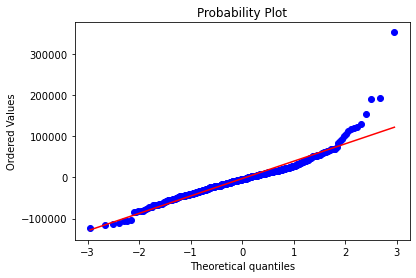

In [217]:
stats.probplot(resid1,dist='norm',plot=pylab)

# Final Prediction of Test DataSet.

In [218]:
test1 = data_test[anova_fs]

In [219]:
test1.shape

(1459, 20)

In [220]:
test1

Bath  YearRemodAdd  KitchenQual_Gd  TotRmsAbvGrd  BsmtQual_Gd  \
1458   1.0          1961               0             5            0   
1459   1.5          1958               1             6            0   
1460   2.5          1998               0             6            1   
1461   2.5          1998               1             7            0   
1462   2.0          1992               1             5            1   
...    ...           ...             ...           ...          ...   
2912   1.5          1970               0             5            0   
2913   1.5          1970               0             6            0   
2914   2.0          1996               0             7            0   
2915   1.5          1992               0             6            1   
2916   2.5          1994               0             9            1   

      Fireplaces  GarageYrBlt  OverallCond  GarageFinish_Unf  \
1458           0       1961.0            6                 1   
1459           0       1958.0            6                 1   
1460           1       1997.0            5                 0   
1461           1       1998.0            6                 0   
1462           0       1992.0            5                 0   
...          ...          ...          ...               ...   
2912           0       1979.0            7                 0   
2913           0       1970.0            5                 1   
2914           1       1960.0            7                 1   
2915           0       1979.0            5                 0   
2916           1       1993.0            5                 0   

      BsmtFinType1_GLQ  GarageFinish_RFn  BedroomAbvGr  MasVnrArea  \
1458                 0                 0             2         0.0   
1459                 0                 0             3       108.0   
1460                 1                 0             3         0.0   
1461                 1                 0             3        20.0   
1462                 0                 1             2         0.0   
...                ...               ...           ...         ...   
2912                 0                 0             3         0.0   
2913                 0                 0             3         0.0   
2914                 0                 0             4         0.0   
2915                 1                 0             3         0.0   
2916                 0                 0             3        94.0   

      HeatingQC_TA  SaleType_New  Neighborhood_NridgHt  CentralAir_Y  \
1458             1             0                     0             1   
1459             1             0                     0             1   
1460             0             0                     0             1   
1461             0             0                     0             1   
1462             0             0                     0             1   
...            ...           ...                   ...           ...   
2912             0             0                     0             1   
2913             1             0                     0             1   
2914             0             0                     0             1   
2915             1             0                     0             1   
2916             0             0                     0             1   

      HouseStyle_2Story  LotShape_Reg  OpenPorchSF  
1458                  0             1            0  
1459                  0             0           36  
1460                  1             0           34  
1461                  1             0           36  
1462                  0             0           82  
...                 ...           ...          ...  
2912                  1             1            0  
2913                  1             1           24  
2914                  0             1            0  
2915                  0             1           32  
2916                  1             1           48  

[1459 rows x 20 columns]

In [221]:
final_prediction=m7.predict(test1)

In [222]:
final_prediction.shape

(1459,)

## Create CSV Submition file

In [223]:
submit_df = pd.DataFrame({'Id':np.arange(1461,2920),'SalePrice':(final_prediction)})

In [224]:
submit_df.to_csv('final_sub_house',index=False)

### check distribution of Predicted SalePrice 

<AxesSubplot:ylabel='Frequency'>

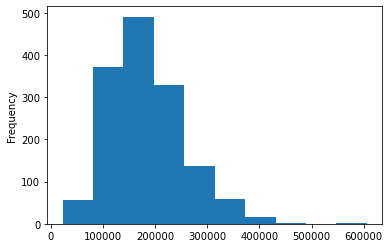

In [225]:
submit_df['SalePrice'].plot(kind='hist')

In [226]:
submit_df.describe()

Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  182011.079025
std     421.321334   70065.286170
min    1461.000000   23038.025502
25%    1825.500000  132909.201172
50%    2190.000000  172340.686570
75%    2554.500000  221352.019170
max    2919.000000  605807.320184

In [227]:
submit_df['SalePrice']

1458     90818.149222
1459    139304.116464
1460    202563.390897
1461    232804.590051
1462    151059.053877
            ...      
2912    111322.554166
2913    101878.265814
2914    159491.727243
2915    139751.862745
2916    226405.268301
Name: SalePrice, Length: 1459, dtype: float64

## Export Model For End to End Project

In [1]:
import pickle

In [2]:
filename = 'house_model.pkl'

In [ ]:
pickle.dump(model,open(filename,'wb'))

###  Verify Model by Models Predictions And Confusion Metrix

In [ ]:
md = pickle.load(open(filename,'rb'))

In [ ]:
pd=md.predict(testx)